<div style="display: flex; background-color: #3F579F;">
    <h1 style="margin: auto; font-weight: bold; color: white; padding: 30px 30px 0px 30px;" align="center">Segment customers of a website - P5</h1>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 5px 30px 0px 30px;" >
    <h3 style="width: 100%; text-align: center; float: left; font-size: 24px; color: white;" align="center">| Modeling notebook |</h3>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 10px 30px 30px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px; color: white;" align="center">Data Scientist course - OpenClassrooms</h4>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries and functions</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries and functions</h3>
</div>

In [1]:
## General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers
import squarify
from statsmodels.graphics.gofplots import qqplot

## df_analysis
import io
import gc
import timeit
import math
from math import pi
from collections import Counter
from math import prod
import scipy.stats as stats

## Scikit Learn 
from sklearn.preprocessing import (FunctionTransformer, QuantileTransformer, 
                                   StandardScaler, RobustScaler, OrdinalEncoder,
                                  MinMaxScaler)
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import (calinski_harabasz_score, davies_bouldin_score,
                             silhouette_score, silhouette_samples, adjusted_rand_score)

## Yellowbrick - Scikit Learn 
from yellowbrick.cluster import intercluster_distance

# Own specific functions 
from functions import *

%matplotlib inline
sns.set_theme(style="darkgrid")

SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.2. Functions declaration</h3>
</div>

In [2]:
def df_analysis(df, name_df, *args, **kwargs):
    """
    Method used to analyze on the DataFrame.

    Parameters:
    -----------------
        df (pandas.DataFrame): Dataset to analyze
        name_df (str): Dataset name
        
        *args, **kwargs:
        -----------------
            columns (list): Dataframe keys in list format
            flag (str): Flag to show complete information about the dataset to analyse
                        "complete" shows all information about the dataset

    Returns:
    -----------------
        None. 
        Print the analysis on the Dataset. 
    """
    
    # Getting the variables
    columns = kwargs.get("columns", None)
    type_analysis = kwargs.get("type_analysis", None)
    
    ORDERING_COMPLETE = [
        "name", "type", "records", "unique", "# NaN", "% NaN", "mean", "min", "25%", "50%", "75%", "max", "std"
    ]
    
    # Calculating the memory usage based on dataframe.info()
    buf = io.StringIO()
    df.info(buf=buf)
    memory_usage = buf.getvalue().split('\n')[-2]
    
    if df.empty:
        print("The", name_df, "dataset is empty. Please verify the file.")
    else:
        empty_cols = [col for col in df.columns if df[col].isna().all()] # identifying empty columns
        df_rows_duplicates = df[df.duplicated()] #identifying full duplicates rows
        
        # Creating a dataset based on Type object and records by columns
        type_cols = df.dtypes.apply(lambda x: x.name).to_dict() 
        df_resume = pd.DataFrame(list(type_cols.items()), columns = ["name", "type"])
        df_resume["records"] = list(df.count())
        df_resume["# NaN"] = list(df.isnull().sum())
        df_resume["% NaN"] = list(((df.isnull().sum() / len(df.index))*100).round(2))
        
        print("\nAnalysis of", name_df, "dataset")
        print(82 * '_')
        print("- Dataset shape:                 ", df.shape[0], "rows and", df.shape[1], "columns")
        print("- Total of NaN values:           ", df.isna().sum().sum())
        print("- Percentage of NaN:             ", round((df.isna().sum().sum() / prod(df.shape)) * 100, 2), "%")
        print("- Total of full duplicates rows: ", df_rows_duplicates.shape[0])
        print("- Total of empty rows:           ", df.shape[0] - df.dropna(axis="rows", how="all").shape[0]) if df.dropna(axis="rows", how="all").shape[0] < df.shape[0] else \
                    print("- Total of empty rows:            0")
        print("- Total of empty columns:        ", len(empty_cols))
        print("  + The empty column is:         ", empty_cols) if len(empty_cols) == 1 else \
                    print("  + The empty column are:         ", empty_cols) if len(empty_cols) >= 1 else None
        print("- Unique indexes:                ", df.index.is_unique)
        
        if columns is not None:
            print("\n- The key(s):", columns, "is not present multiple times in the dataframe.\n  It CAN be used as a primary key.") if df.size == df.drop_duplicates(columns).size else \
                print("\n- The key(s):", columns, "is present multiple times in the dataframe.\n  It CANNOT be used as a primary key.")
            
        if type_analysis == "summarized":
            print("\n")
        
        if type_analysis is None or type_analysis != "summarized":
            pd.set_option("display.max_rows", None) # show full of showing rows
            pd.set_option("display.max_columns", None) # show full of showing cols
            pd.set_option("display.max_colwidth", None) # show full width of showing cols
            pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    
            
            if type_analysis is None or type_analysis != "complete":
                print("\n- Type object and records by columns      (",memory_usage,")")
                print(82 * '_')
            elif type_analysis == "complete" and (df.select_dtypes(["int64"]).shape[1] > 0 or df.select_dtypes(["float64"]).shape[1] > 0):
                df_resume["unique"] = list(df.nunique())
                df_desc = pd.DataFrame(df.describe().T).reset_index()
                df_desc = df_desc.rename(columns={"index": "name"})
                df_resume = df_resume.merge(right=df_desc[["name", "mean", "min", "25%", "50%", "75%", "max", "std"]], on="name", how="left")
                df_resume = df_resume[ORDERING_COMPLETE]
                print("\n- Type object and records by columns      (",memory_usage,")")
                print(82 * '_')
            
            display(df_resume.sort_values("records", ascending=False))
            
            pd.reset_option("display.max_rows") # reset max of showing rows
            pd.reset_option("display.max_columns") # reset max of showing cols
            pd.reset_option("display.max_colwidth") # reset width of showing cols
            pd.reset_option("display.float_format") # reset show full content in cell
            
        # deleting dataframe to free memory
        if type_analysis == "complete":
            
            if df.select_dtypes(["int64"]).shape[1] > 0 or df.select_dtypes(["float64"]).shape[1] > 0:
                del [[df_resume, df_desc]]
            else:
                del [[df_resume]]
            
            gc.collect()
            df_resume, df_desc = (pd.DataFrame() for i in range(2))
        else:
            del df_resume
            gc.collect()
            df_resume = pd.DataFrame()
            

def normality_test(df):
    """
    Method used to make the normality test.

    Parameters:
    -----------------
        df (pandas.DataFrame): Dataset to analyze

    Returns:
    -----------------
        None. 
        Print the tests on a new Dataset. 
    """
    
    list_test = {
        "Shapiro-Wilk":stats.shapiro, "D’Agostino’s K^2":stats.normaltest,
        "Kolmogorov-Smirnov":stats.kstest
    }
    
    
    alpha = 0.05
    fail_to_reject_H = "Sample looks Gaussian (fail to reject H0)"
    reject_H = "Sample does not look Gaussian (reject H0)"
    
    variable, test_name, result, hypothesis = [[] for i in range(4)]
    
    for key, value in list_test.items():
    
        for col in df.columns:
            
            if df[col].dtypes == "float64" or df[col].dtypes == "int64":
                variable.append(col)
                test_name.append(key)
                
                if key == "Kolmogorov-Smirnov":
                    stat, p_value = value(df[col], cdf="norm")
                else:
                    stat, p_value = value(df[col])
                    
                result.append("Statistics=%.3f, p-value=%.3f" % (stat, p_value))
                hypothesis.append(fail_to_reject_H.translate(SUB)) if p_value > alpha else hypothesis.append(reject_H.translate(SUB))
                
    df_normality_test = pd.DataFrame({
                            "variable": variable,
                            "normality test": test_name, 
                            "result": result,
                            "hypothesis": hypothesis})
    
    display(df_normality_test)
    
            
def number_of_cluster(df, name_df):
    """
    Method used to calculate the number of cluster through differents metrics

    Parameters:
    -----------------
        df (pandas.DataFrame): Dataset to analyze
        
        Metrics:
        -----------------
            WSSE (dict): Within-Cluster-Sum of Squared Errors. Number of cluster by iteration
            davies_bouldin (dict): Davies-Bouldin score. Number of cluster by iteration
            silhouette (dict): The mean Silhouette Coefficient of all samples. Number of cluster by iteration
        
        Returns:
    -----------------
        None. 
        Plot the result. 
    """
    
    WSSE, davies_bouldin, silhouette = ({} for i in range(3))
    
    for i in range(2, 10):
        
        kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=10).fit(df)
        
        clusters = kmeans.labels_
        WSSE[i] = kmeans.inertia_ 
        davies_bouldin[i] = davies_bouldin_score(df, clusters)
        silhouette[i] = silhouette_score(df, clusters)
        
    # Plotting the result   
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18, 5))

    fig.suptitle("Number of cluster - " + name_df, size=25, fontweight="bold", y=1.01)

    ax1.plot(list(WSSE.keys()), list(WSSE.values()), color="blue", marker="o")
    ax1.set_title("Within-Cluster-Sum of Squared Errors", fontdict={ "fontsize": 15})
    ax1.set_xlabel("Number of cluster")
    ax1.set_ylabel("WSSE")

    ax2.plot(list(davies_bouldin.keys()), list(davies_bouldin.values()), color="red", marker="o")
    ax2.set_title("Davies-Bouldin score", fontdict={ "fontsize": 15})
    ax2.set_xlabel("Number of cluster")
    ax2.set_ylabel("Davies-Bouldin values")

    ax3.plot(list(silhouette.keys()), list(silhouette.values()), color="gold", marker="o")
    ax3.set_title("Silhouette score", fontdict={ "fontsize": 15})
    ax3.set_xlabel("Number of cluster")
    ax3.set_ylabel("Silhouette score")
    
    plt.tight_layout()
    plt.savefig("images/Number-of-cluster-" + name_df + ".png", bbox_inches="tight")
    sns.despine(fig)  
    plt.show()
    
    
def silhoutte_analysis(X):
    """
    Method used to make the silhoutte analysis

    Parameters:
    -----------------
        X (pandas.DataFrame): Dataset to analyze
        
        Returns:
    -----------------
        None. 
        Plot the result. 
    """
    
    range_n_clusters = range(2, 10)

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
    
    
def benchmark_kmeans(name, kmeans, n_clusters, data):
    """
    Method used to calculate the KMeans benchmark considering differents metrics
    based on external and internal information

    Parameters:
    -----------------
        name (str): Name of the setup
        kmeans (class sklearn.cluster.KMeans): Model KMeans initialized
        n_clusters (int): Number of cluster. It is the same number of n_clusters in kmeans
        data (pandas.DataFrame): Dataset to analyze
        
        Returns:
    -----------------
        None. 
        Print the result. 
    """
    
    start_time_model = timeit.default_timer()
    cluster_labels = kmeans.fit_predict(data)
    end_time_model =  round(timeit.default_timer() - start_time_model, 3)
    
    results = [name, n_clusters, end_time_model, kmeans.inertia_]
    
    # Metrics which require the full dataset
    clustering_metrics = [
        calinski_harabasz_score,
        davies_bouldin_score,
        silhouette_score
    ]    
    
    results += [m(data, kmeans.labels_) for m in clustering_metrics]
       
    
    formatter_result = ("{:<15} {:<10} {:}s {:>8.0f} {:>16.3f} {:>15.3f} {:>18.3f} ")

    print(formatter_result.format(*results))
    

def df_spider_RFM(df, label_score, color):
    
    """
    Method used to plot RFM through spider plot

    Parameters:
    -----------------
        df (pandas.DataFrame): Dataset to plot
        label_score (str): Segmentation
        color: (dict): Color for each segmentation
        
    Returns:
    -----------------
        None. 
        PLot the RFM Segmentation. 
    """
    
    # Grouping the mean based on rfm_score_label
    df_to_plot = df.groupby([label_score]).agg("mean").reset_index()
    
    # Data Standarization
    df_to_plot_std = pd.DataFrame(MinMaxScaler().fit_transform(df_to_plot[["recency", "frequency", "monetary"]]), 
                                  columns=list(df_to_plot[["recency", "frequency", "monetary"]].columns),
                                  index=df_to_plot[["recency", "frequency",	"monetary"]].index)
    
    # Concatenating the rfm score label
    df_to_plot_std = pd.concat([df_to_plot_std, df_to_plot[[label_score]]], axis=1)
    df_to_plot_std = df_to_plot_std[[label_score, "recency", "frequency", "monetary"]]
    
    # number of variable
    variables = list(df_to_plot_std)[1:]
    N = len(variables)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    fig = plt.figure(1, figsize=(18, 20))
    
    for i, segment in enumerate(df[label_score].unique()):
        
        ax = fig.add_subplot(4, 3, i + 1, polar=True)
        
        # We are going to plot the first line of the data frame.
        # But we need to repeat the first value to close the circular graph:
        values = list(df_to_plot_std.loc[i][["recency", "frequency", "monetary"]].values)
        values += values[:1]
        
        ax.set_title(segment, color=color[segment], fontdict={ "fontsize": 15, "fontweight": "bold" })
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)
        ax.set_rlabel_position(0)
        
        # Draw one axe per variable + add labels
        plt.xticks(angles[:-1], variables, color="grey", size=8)
        ax.set_xticklabels(variables, size=12)
        ax.set_rlabel_position(0)
        
        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5], ["-1.5", "-1", "-0.5", "0", "0.5", "1", "1.5"], color="grey", size=7)
        plt.ylim(-1.5, 1.5)
        
        # Plot data
        ax.plot(angles, values, color[segment], "o-", linewidth=1, linestyle="solid")

        # Fill area
        ax.fill(angles, values, color[segment], alpha=.25)

    # Show the graph
    plt.savefig("images/RFM-spider-segmentation-clusters.png")
    plt.show()

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.1. Importing and preparing files</h3>
</div>

<div class="alert alert-block alert-info">
    We are going to load the dateset resulting from the RFM
</div>

In [3]:
df_data = pd.read_csv(r"datasets\data_to_model_0_months.csv")

In [4]:
df_data.head()

customer_unique_id  recency  frequency  monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      115      False    141.90   
1  0000f6ccb0745a6a4b88665a16c9f078      325      False     43.62   
2  0004aac84e0df4da2b147fca70cf8255      292      False    196.89   
3  0004bd2a26a76fe21f786e4fbd80607f      150      False    166.98   
4  00050ab1314c0e55a6ca13cf7181fecf      135      False     35.38   

   satisfaction  fashion  furniture  others  electronics  sports_leisure  \
0           5.0      0.0      100.0     0.0          0.0             0.0   
1           4.0      0.0        0.0     0.0        100.0             0.0   
2           5.0      0.0        0.0     0.0        100.0             0.0   
3           4.0      0.0        0.0     0.0          0.0             0.0   
4           4.0      0.0        0.0     0.0        100.0             0.0   

   home  construction  
0   0.0           0.0  
1   0.0           0.0  
2   0.0           0.0  
3   0.0         100.0  
4   0.0           0.0

In [5]:
df_analysis(df_data, "df_data", type_analysis="complete")


Analysis of df_data dataset
__________________________________________________________________________________
- Dataset shape:                  73074 rows and 12 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 6.2+ MB )
__________________________________________________________________________________


name     type  records  unique  # NaN   % NaN      mean  \
0   customer_unique_id   object    73074   73074      0 0.00000       NaN   
1              recency    int64    73074     362      0 0.00000 175.79129   
2            frequency     bool    73074       2      0 0.00000       NaN   
3             monetary  float64    73074   26864      0 0.00000 148.84485   
4         satisfaction  float64    73074      29      0 0.00000   4.08241   
5              fashion  float64    73074     457      0 0.00000  24.29487   
6            furniture  float64    73074     509      0 0.00000  17.05804   
7               others  float64    73074     460      0 0.00000  15.92235   
8          electronics  float64    73074     280      0 0.00000  16.46334   
9       sports_leisure  float64    73074     305      0 0.00000  13.09358   
10                home  float64    73074     287      0 0.00000   7.34880   
11        construction  float64    73074     248      0 0.00000   5.81903   

       min      25%       50%       75%        max       std  
0      NaN      NaN       NaN       NaN        NaN       NaN  
1  0.00000 92.00000 175.00000 263.00000  364.00000  98.87073  
2      NaN      NaN       NaN       NaN        NaN       NaN  
3  9.59000 63.10000 107.69500 177.36000 6081.54000 155.56498  
4  1.00000  4.00000   5.00000   5.00000    5.00000   1.34564  
5  0.00000  0.00000   0.00000   0.00000  100.00000  42.73351  
6  0.00000  0.00000   0.00000   0.00000  100.00000  37.41165  
7  0.00000  0.00000   0.00000   0.00000  100.00000  36.40485  
8  0.00000  0.00000   0.00000   0.00000  100.00000  36.98389  
9  0.00000  0.00000   0.00000   0.00000  100.00000  33.60157  
10 0.00000  0.00000   0.00000   0.00000  100.00000  25.93429  
11 0.00000  0.00000   0.00000   0.00000  100.00000  23.25587

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">3. Dimensionality Reduction</h2>
</div>

<div class="alert alert-block alert-info">
    <p>For the <b>Dimensionality Reduction</b> we are going to work as follow</p>
    <ol>
        <li>One dataset with only feautures of <b>RFM</b>, called (REDUCED)
            <ul style="list-style-type: disc;">
                <li>recency</li>
                <li>frequency</li>
                <li>monetary</li>
            </ul> 
        </li>
        <li>Another dataset with <b>all features</b>, called (COMPLETED)</li>
    </ol> 
</div>

In [6]:
data_reduced = df_data[["recency", "frequency", "monetary"]].copy()
data_complete = df_data.drop(["customer_unique_id"], axis=1).copy()

In [7]:
df_analysis(data_reduced, "data_reduced", type_analysis="complete")


Analysis of data_reduced dataset
__________________________________________________________________________________
- Dataset shape:                  73074 rows and 3 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  3723
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 1.2 MB )
__________________________________________________________________________________


name     type  records  unique  # NaN   % NaN      mean     min  \
0    recency    int64    73074     362      0 0.00000 175.79129 0.00000   
1  frequency     bool    73074       2      0 0.00000       NaN     NaN   
2   monetary  float64    73074   26864      0 0.00000 148.84485 9.59000   

       25%       50%       75%        max       std  
0 92.00000 175.00000 263.00000  364.00000  98.87073  
1      NaN       NaN       NaN        NaN       NaN  
2 63.10000 107.69500 177.36000 6081.54000 155.56498

In [8]:
df_analysis(data_complete, "data_complete", type_analysis="complete")


Analysis of data_complete dataset
__________________________________________________________________________________
- Dataset shape:                  73074 rows and 11 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  1377
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 5.6 MB )
__________________________________________________________________________________


name     type  records  unique  # NaN   % NaN      mean     min  \
0          recency    int64    73074     362      0 0.00000 175.79129 0.00000   
1        frequency     bool    73074       2      0 0.00000       NaN     NaN   
2         monetary  float64    73074   26864      0 0.00000 148.84485 9.59000   
3     satisfaction  float64    73074      29      0 0.00000   4.08241 1.00000   
4          fashion  float64    73074     457      0 0.00000  24.29487 0.00000   
5        furniture  float64    73074     509      0 0.00000  17.05804 0.00000   
6           others  float64    73074     460      0 0.00000  15.92235 0.00000   
7      electronics  float64    73074     280      0 0.00000  16.46334 0.00000   
8   sports_leisure  float64    73074     305      0 0.00000  13.09358 0.00000   
9             home  float64    73074     287      0 0.00000   7.34880 0.00000   
10    construction  float64    73074     248      0 0.00000   5.81903 0.00000   

        25%       50%       75%        max       std  
0  92.00000 175.00000 263.00000  364.00000  98.87073  
1       NaN       NaN       NaN        NaN       NaN  
2  63.10000 107.69500 177.36000 6081.54000 155.56498  
3   4.00000   5.00000   5.00000    5.00000   1.34564  
4   0.00000   0.00000   0.00000  100.00000  42.73351  
5   0.00000   0.00000   0.00000  100.00000  37.41165  
6   0.00000   0.00000   0.00000  100.00000  36.40485  
7   0.00000   0.00000   0.00000  100.00000  36.98389  
8   0.00000   0.00000   0.00000  100.00000  33.60157  
9   0.00000   0.00000   0.00000  100.00000  25.93429  
10  0.00000   0.00000   0.00000  100.00000  23.25587

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.1. Data preprocessing</h3>
</div>

<div class="alert alert-block alert-info">
     <p>We are going to process the features as follows</p>
    <p><b>Boolean features</b><br>
    Transforming them into int</p>
    <p><b>Numerical features</b><br>
    Normalizing the features through QuantileTransformer due to all of them do not have a normal distribution</p>
</div>

In [9]:
def boolean_transformation(X):
    # Transforming the boolean features into int
    return X.astype(int)

In [10]:
DFs_ORIGINAL = {
    "reduced" : data_reduced,
    "complete" : data_complete
}

DFs_SCALED = {}

In [11]:
for key, value in DFs_ORIGINAL.items():

    BOOLEAN_FEATURES = ["frequency"]

    if key == "reduced":
        NUMERICAL_FEATURES = ["recency", "monetary"]
    else: 
        NUMERICAL_FEATURES = ["recency", "monetary", "satisfaction", "fashion",
                              "furniture", "others", "electronics", "sports_leisure",
                              "home", "construction"]

    boolean_pipeline = make_pipeline(FunctionTransformer(boolean_transformation))

    numerical_pipeline = make_pipeline(QuantileTransformer(random_state=42, output_distribution="uniform"))
    
    preprocessor = make_column_transformer(
                (boolean_pipeline, BOOLEAN_FEATURES), 
                (numerical_pipeline, NUMERICAL_FEATURES)
    )

    # Droping the real columns and concatenating the encoder columns
    globals()["data_sample_scaled_" + key] = preprocessor.fit_transform(value)
    globals()["df_sample_scaled_" + key] = pd.DataFrame(globals()["data_sample_scaled_" + key], index=value.index, columns=value.columns)

    DFs_SCALED["df_sample_scaled_" + key] = globals()["df_sample_scaled_" + key]

In [12]:
df_sample_scaled_reduced.head()

recency  frequency  monetary
0      0.0   0.309309  0.640069
1      0.0   0.925926  0.122082
2      0.0   0.860861  0.792814
3      0.0   0.422923  0.720949
4      0.0   0.377377  0.065941

In [13]:
df_analysis(df_sample_scaled_reduced, "df_sample_scaled_reduced", type_analysis="complete")


Analysis of df_sample_scaled_reduced dataset
__________________________________________________________________________________
- Dataset shape:                  73074 rows and 3 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  3725
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 1.7 MB )
__________________________________________________________________________________


name     type  records  unique  # NaN   % NaN    mean     min     25%  \
0    recency  float64    73074       2      0 0.00000 0.02507 0.00000 0.00000   
1  frequency  float64    73074     362      0 0.00000 0.50004 0.00000 0.25075   
2   monetary  float64    73074   26471      0 0.00000 0.50000 0.00000 0.25015   

      50%     75%     max     std  
0 0.00000 0.00000 1.00000 0.15634  
1 0.50050 0.75075 1.00000 0.28869  
2 0.50020 0.75015 1.00000 0.28868

In [14]:
df_sample_scaled_complete.head()

recency  frequency  monetary  satisfaction  fashion  furniture  others  \
0      0.0   0.309309  0.640069      1.000000      0.0        1.0     0.0   
1      0.0   0.925926  0.122082      0.327828      0.0        0.0     0.0   
2      0.0   0.860861  0.792814      1.000000      0.0        0.0     0.0   
3      0.0   0.422923  0.720949      0.327828      0.0        0.0     0.0   
4      0.0   0.377377  0.065941      0.327828      0.0        0.0     0.0   

   electronics  sports_leisure  home  construction  
0          0.0             0.0   0.0           0.0  
1          1.0             0.0   0.0           0.0  
2          1.0             0.0   0.0           0.0  
3          0.0             0.0   0.0           1.0  
4          1.0             0.0   0.0           0.0

In [15]:
df_analysis(df_sample_scaled_complete, "df_sample_scaled_complete", type_analysis="complete")


Analysis of df_sample_scaled_complete dataset
__________________________________________________________________________________
- Dataset shape:                  73074 rows and 11 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  1377
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 6.1 MB )
__________________________________________________________________________________


name     type  records  unique  # NaN   % NaN    mean     min  \
0          recency  float64    73074       2      0 0.00000 0.02507 0.00000   
1        frequency  float64    73074     362      0 0.00000 0.50004 0.00000   
2         monetary  float64    73074   26471      0 0.00000 0.50000 0.00000   
3     satisfaction  float64    73074      29      0 0.00000 0.65774 0.00000   
4          fashion  float64    73074     457      0 0.00000 0.24448 0.00000   
5        furniture  float64    73074     509      0 0.00000 0.17281 0.00000   
6           others  float64    73074     460      0 0.00000 0.16151 0.00000   
7      electronics  float64    73074     280      0 0.00000 0.16616 0.00000   
8   sports_leisure  float64    73074     305      0 0.00000 0.13243 0.00000   
9             home  float64    73074     287      0 0.00000 0.07532 0.00000   
10    construction  float64    73074     248      0 0.00000 0.05972 0.00000   

       25%     50%     75%     max     std  
0  0.00000 0.00000 0.00000 1.00000 0.15634  
1  0.25075 0.50050 0.75075 1.00000 0.28869  
2  0.25015 0.50020 0.75015 1.00000 0.28868  
3  0.32783 1.00000 1.00000 1.00000 0.40662  
4  0.00000 0.00000 0.00000 1.00000 0.42844  
5  0.00000 0.00000 0.00000 1.00000 0.37676  
6  0.00000 0.00000 0.00000 1.00000 0.36685  
7  0.00000 0.00000 0.00000 1.00000 0.37152  
8  0.00000 0.00000 0.00000 1.00000 0.33827  
9  0.00000 0.00000 0.00000 1.00000 0.26339  
10 0.00000 0.00000 0.00000 1.00000 0.23657

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.2. Principal component analysis - PCA</h3>
</div>

In [16]:
DFs_REDUCED, DFs_PCA = [{} for i in range(2)]

In [17]:
n_comp_reduced, n_comp_complete = 3, 10

for key, value in DFs_ORIGINAL.items():
    
    # Selecting the features to analyse with PCA and 
    # be able to transform to Dataset after making the PCA
    globals()["X_" + key] = globals()["df_sample_scaled_" + key].values
    globals()["index_values_" + key] = globals()["df_sample_scaled_" + key].index
    globals()["features_" + key] = globals()["df_sample_scaled_" + key].columns
    
    # Principal components determination 
    globals()["pca_" + key] = PCA(n_components=globals()["n_comp_" + key]).fit(globals()["X_" + key])
    
    # Making a dataset for reduced data based on PCA results
    globals()["df_reduced_" + key] =  globals()["pca_" + key].transform(globals()["X_" + key])
    
    # Making a dataset based on PCA results
    globals()["df_pca_" + key] = pd.DataFrame(globals()["pca_" + key].components_, 
                                              index=["PC" + str(i + 1) for i in range(globals()["n_comp_" + key])],
                                              columns=globals()["features_" + key] ).T
    
    DFs_REDUCED["df_reduced_" + key] = globals()["df_reduced_" + key]
    DFs_PCA["df_pca_" + key] = globals()["df_pca_" + key]

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2.1. PCA projection 2D</h4>
</div>

In [18]:
for key, value in DFs_REDUCED.items():
    print(value.shape)


(73074, 3)
(73074, 10)


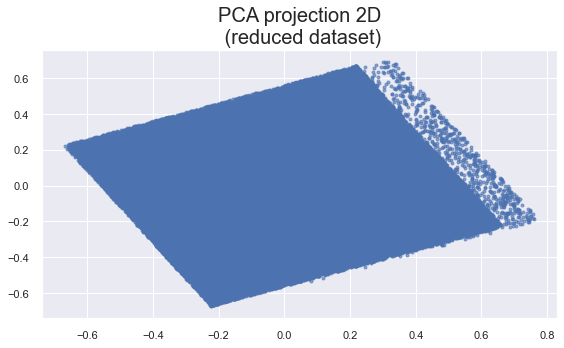

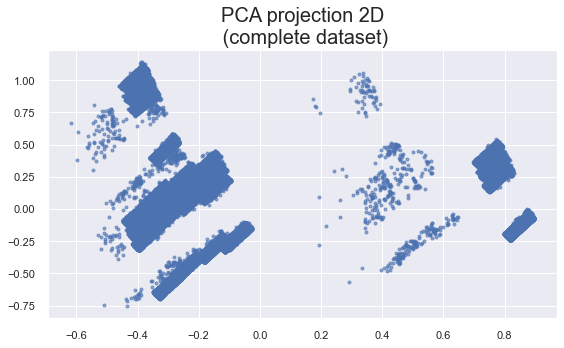

In [19]:
for key, value in DFs_REDUCED.items():
    plt.figure(figsize=(8,5))
    plt.title("PCA projection 2D\n (" + key.rsplit("_")[-1] + " dataset)", size=20)
    plt.scatter(value[:, 0], value[:, 1], alpha=0.6, marker='.')
    plt.tight_layout()
    plt.savefig("images/PCA-projection-2D-" + key + ".png")
    plt.show()
    

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>For now, It seems that there are more defined clusters for only RFM features in comparison with all features</p>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2.2. Correlation matrix</h4>
</div>

<div class="alert alert-block alert-info">
    Plotting the <b>Correlation matrix</b>
</div>

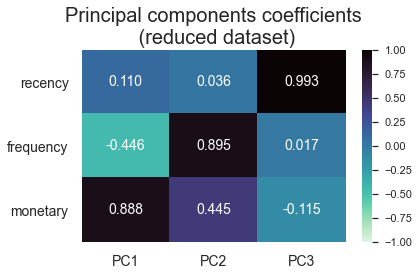

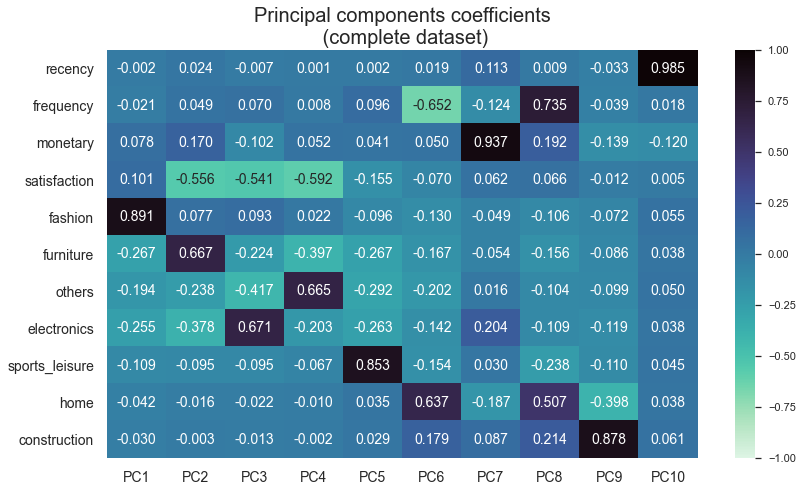

In [20]:
for key, value in DFs_ORIGINAL.items():
    
    if key == "reduced":
        plt.figure(figsize=(6,4))
    else:
        plt.figure(figsize=(12, 7))
        
    plt.title("Principal components coefficients\n (" + key + " dataset)", size=20)
    
    ax = sns.heatmap(globals()["df_pca_" + key], vmin=-1, vmax=1, center=0, cmap="mako_r",
                    annot=True, annot_kws={"size": 14}, fmt=".3f")

    plt.xticks(size=14)
    plt.yticks(rotation=0, size=14)
    plt.tight_layout()
    plt.savefig("images/principal-components-coefficients-" + key + ".png")
    plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: disc;">
        <li><b>Dataset reduced: </b>Monetary has a strong relation with PC1 and PC2. At the same time, Frequency has a positive relation with PC2 and inverse relation with PC1.<br>
            Finally, Recency has a strong relation with PC3</li>
        <li><b>Dataset complete: </b>We can see how category are distributed among the differents components. Recency has a strong relation with PC1 and PC2 has a strong relation with the product weight and volume</li>
    </ul> 
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2.3. Scree of eigenvalues</h4>
</div>

<div class="alert alert-block alert-info">
    Plotting the <b>Scree of eigenvalues</b>
</div>

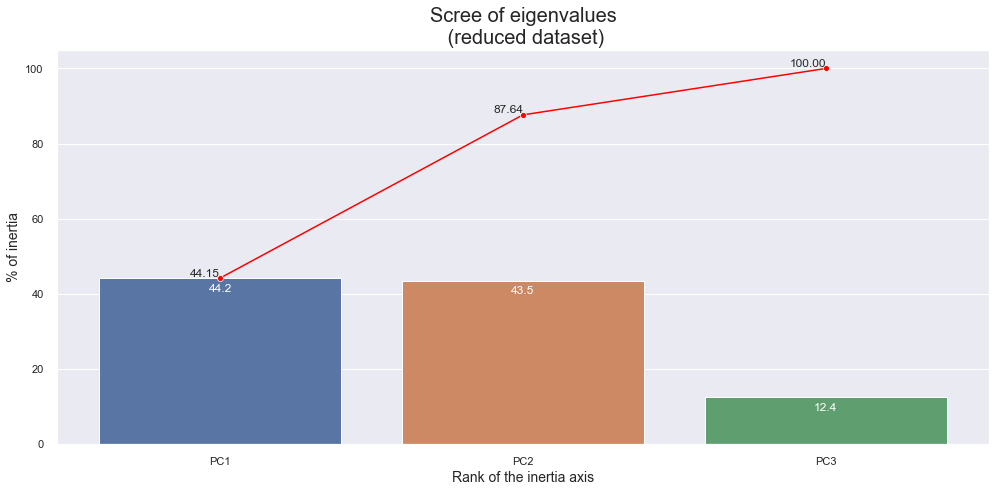

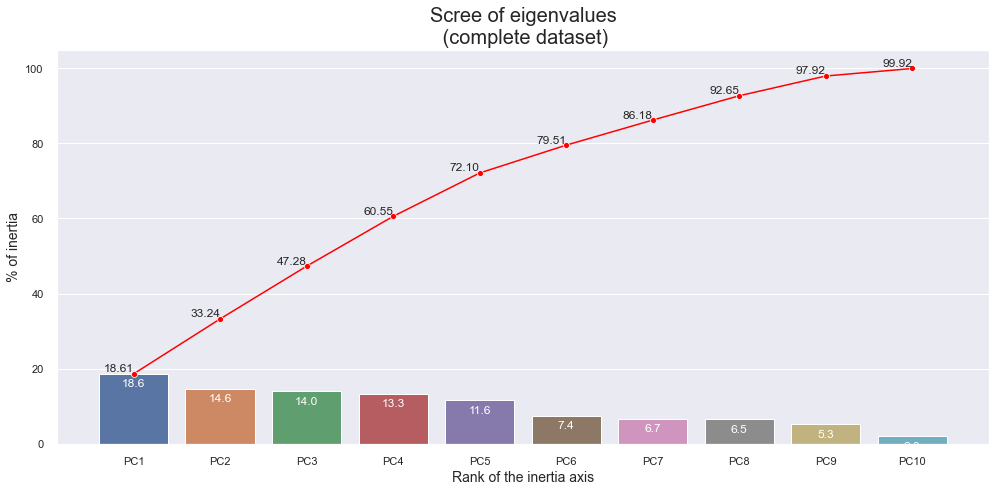

In [21]:
for key, value in DFs_ORIGINAL.items():
    
    scree = globals()["pca_" + key].explained_variance_ratio_*100

    fig = plt.subplots(figsize=(14, 7))
    plot_bar = sns.barplot(x=globals()["df_pca_" + key].columns, y=scree)
    for p in plot_bar.patches:
        plot_bar.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha="center", va="bottom", xytext=(0, -15), textcoords="offset points", color="white")
    plot_line = sns.lineplot(x=globals()["df_pca_" + key].columns, y=scree.cumsum(), marker="o", color="red")

    for x, y in zip(globals()["df_pca_" + key].columns, scree.cumsum()):
        plot_line.text(x, y, "{:.2f}".format(y), ha="right", va="bottom")

    plt.xlabel("Rank of the inertia axis", size=14)
    plt.ylabel("% of inertia", size=14)
    plt.title("Scree of eigenvalues\n (" + key + " dataset)", size=20)
    plt.tight_layout()
    plt.savefig("images/scree-of-eigenvalues-" + key + ".png")
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: disc;">
        <li><b>Dataset reduced: </b>PC2 has the 87.64% of the data variance. </li>
        <li><b>Dataset completed: </b>PC8 has the 92.65% of the data variance.</li>
    </ul> 
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2.4. Correlation Circle</h4>
</div>

<div class="alert alert-block alert-info">
    Plotting the <b>Correlation Circle</b> for <b>dataset reduced</b>
</div>

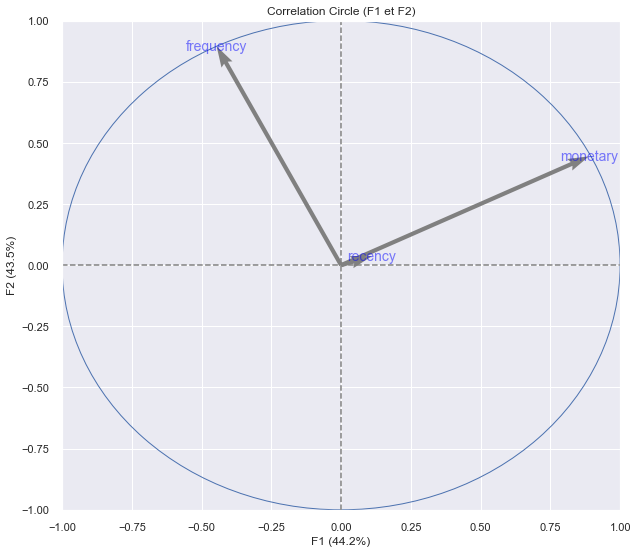

In [22]:
display_circles(pca_reduced.components_, n_comp_reduced, pca_reduced, [(0,1),(2,3),(4,5)], labels=np.array(features_reduced))

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Recency has not a strong influence in PC1 or PC2 unlike to Frequency and Monetary</p>
</div>

<div class="alert alert-block alert-info">
    Plotting the <b>Correlation Circle</b> for <b>dataset completed</b>
</div>

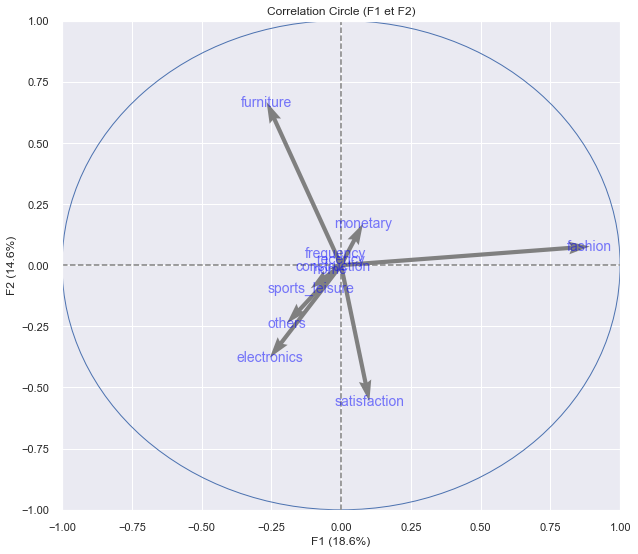

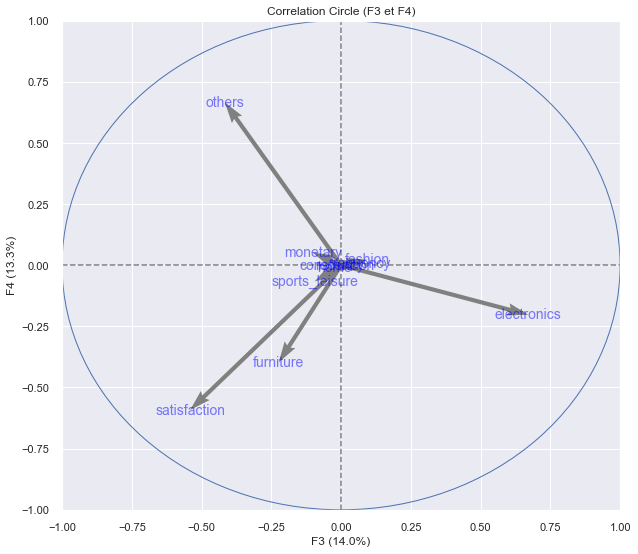

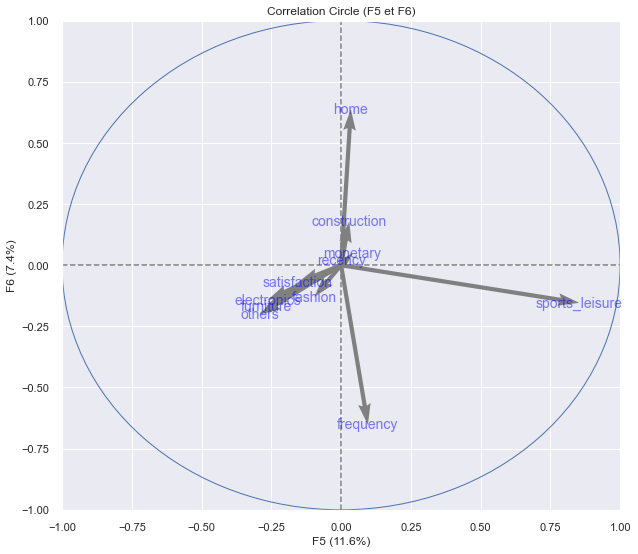

In [23]:
display_circles(pca_complete.components_, n_comp_complete, pca_complete, [(0,1),(2,3),(4,5)], labels=np.array(features_complete))

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2.5. Variance of the components</h4>
</div>

<div class="alert alert-block alert-info">
    <p>For both dataset, we are going to keep the 85% of the variance</p>
</div>

In [24]:
var_threshold = 0.85

for key, value in DFs_ORIGINAL.items():
    
    print(key)
        
    # Processing the PCA
    globals()["pca_" + key] = decomposition.PCA()
    globals()["pca_" + key].fit(globals()["X_" + key])
    
    # Getting the explained variance ratio for each principal component
    globals()["scree_" + key] = globals()["pca_" + key].explained_variance_ratio_
    
    # Getting the number of principal components to reach variance thresholds
    globals()["mask_" + key] = globals()["scree_" + key].cumsum() > var_threshold
    globals()["nb_selected_components_" + key] = len(globals()["scree_" + key][~globals()["mask_" + key]]) + 1
    
    # Compute and displays the actual ratio of explained variance
    globals()["explained_variance_sum_" + key] = globals()["scree_" + key].cumsum()[globals()["nb_selected_components_" + key]-1]

    # Getting the projection of the data on the first components
    globals()["X_PCA_" + key] = globals()["pca_" + key].transform(globals()["X_" + key])[:,:globals()["nb_selected_components_" + key]]

    
    COL_TO_PC =  ["PC" + str(i + 1) for i in range(globals()["nb_selected_components_" + key])]
    globals()["df_pca_" + key] = pd.DataFrame(data=globals()["X_PCA_" + key], columns=COL_TO_PC, index=globals()["index_values_" + key])
    
    DFs_PCA["df_pca_" + key] = globals()["df_pca_" + key]
    
    print("-- Dataset " + key + " components --")
    print("Number of selected components:", globals()["nb_selected_components_" + key])
    print("Cumulative explained variance:  {:.2f}%".format(globals()["explained_variance_sum_" + key]*100))
    print("Shape: " + str(globals()["df_pca_" + key].shape))
    print("\n")


reduced
-- Dataset reduced components --
Number of selected components: 2
Cumulative explained variance:  87.64%
Shape: (73074, 2)


complete
-- Dataset complete components --
Number of selected components: 7
Cumulative explained variance:  86.18%
Shape: (73074, 7)




<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: disc;">
        <li><b>Dataset reduced: </b>We got 87.64% of the variance and 2 Components. </li>
        <li><b>Dataset completed: </b>we got 86.18% of the variance and 7 components</li>
    </ul> 
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">4. Datasets to works</h2>
</div>

<div class="alert alert-block alert-info">
    <p>As you can notice, we are working with 2 datasets </p>
    <ul style="list-style-type: disc;">
        <li><b>Reduced dataset</b>: PCA only 3 features (RFM)</li>
        <li><b>Completed dataset</b>: PCA all features</li>
    </ul> 
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">4.1. PCA Reduced dataset</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Based on the RFM segmentation<br>
    Below, the used features to do the PCA
    </p>
    <ul style="list-style-type: disc;">
        <li>recency</li>
        <li>frequency</li>
        <li>monetary</li>
    </ul> 
</div>

In [25]:
df_pca_reduced

PC1       PC2
0      0.206740 -0.109270
1     -0.528414  0.212047
2      0.096371  0.452236
3      0.227898  0.028380
4     -0.333578 -0.303792
...         ...       ...
73069 -0.269405  0.135253
73070  0.094879  0.297571
73071  0.471316  0.135194
73072 -0.222652  0.179940
73073  0.164608 -0.095672

[73074 rows x 2 columns]

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">4.2. PCA Complete dataset</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Based on the RFM segmentation and the most purchased categories<br>
    Below, the used features to do the PCA
    </p>
    <ul style="list-style-type: disc;">
        <li>recency</li>
        <li>frequency</li>
        <li>monetary</li>
        <li>satisfaction</li>
        <li>fashion</li>
        <li>furniture</li>
        <li>others</li>
        <li>electronics</li>
        <li>sports_leisure</li>
        <li>home</li>
        <li>construction</li>
    </ul> 
</div>

In [26]:
df_pca_complete 

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0     -0.295737  0.471210 -0.449597 -0.595284 -0.289271  0.018178  0.108811
1     -0.406111 -0.256786  0.904180 -0.024098 -0.143680 -0.337294 -0.236330
2     -0.284049 -0.520163  0.467910 -0.387933 -0.226160 -0.308981  0.441725
3     -0.122740  0.194851  0.124830  0.203005  0.125031  0.341148  0.270001
4     -0.398743 -0.293337  0.871707 -0.031612 -0.198693  0.017589 -0.220769
...         ...       ...       ...       ...       ...       ...       ...
73069  0.828213 -0.151588 -0.069974 -0.188424 -0.089989 -0.241907 -0.238215
73070 -0.225596 -0.399009 -0.622028  0.475259 -0.271563 -0.282508  0.204145
73071  0.786276  0.501423  0.380133  0.435244  0.060384  0.078002  0.365863
73072 -0.321057 -0.080753 -0.221410  0.855996 -0.178055 -0.276095 -0.159620
73073  0.859321 -0.122638 -0.127049 -0.176961 -0.116622  0.033733  0.080663

[73074 rows x 7 columns]

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">5. K-Means - (PCA reduced)</h2>
</div>

<div class="alert alert-block alert-info">
    <p>Let's see in details the cluster for the reduced dataset after doing the PCA</p>
    
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.1. Number of Cluster</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to use <b>internal information</b> to identify the the number of cluster. To do that, we are going to use the following metrics:</p>
    <ul style="list-style-type: disc;">
        <li><b>Within-Cluser-Sum of Squared Errors</b></li>
        <li><b>Davies-Bouldin score</b></li>
        <li><b>Silhouette score</b></li>
    </ul> 
</div>

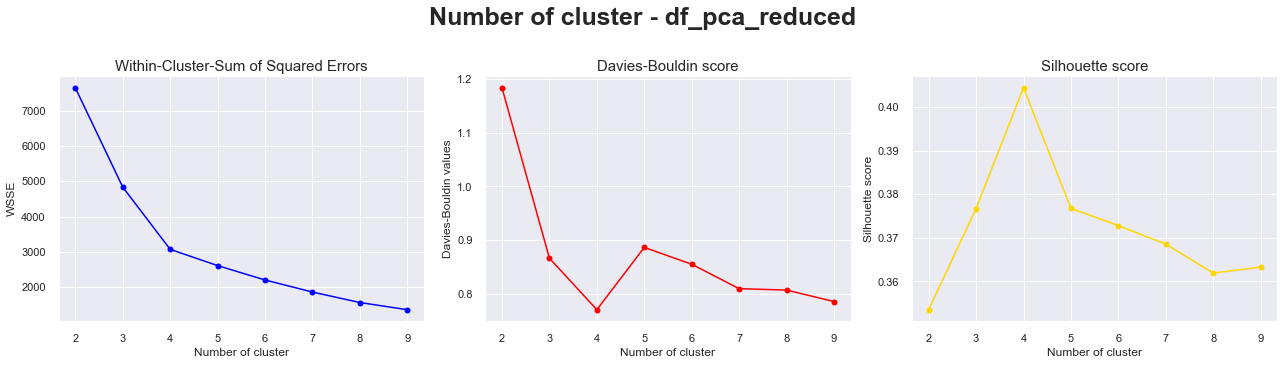

In [27]:
number_of_cluster(df_pca_reduced, "df_pca_reduced")

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: disc;">
        <li>For <b>Reduced dataset</b>, we can see how the three metrics have given similar results in 4 clusters.</li>
    </ul> 
    <p>For now, we are going to work with <b>Silhouette score</b> because it is the most informative, and we are going to work with the number of cluster higher or close to 1</p>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.2. Silhouette analysis</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's go deeper into the Silhoutte analysis</p>
</div>

For n_clusters = 2 The average silhouette_score is : 0.35352040765439713
For n_clusters = 3 The average silhouette_score is : 0.37674029464077297
For n_clusters = 4 The average silhouette_score is : 0.40445401159149613
For n_clusters = 5 The average silhouette_score is : 0.37678773346336986
For n_clusters = 6 The average silhouette_score is : 0.3728151050570926
For n_clusters = 7 The average silhouette_score is : 0.3685782522275606
For n_clusters = 8 The average silhouette_score is : 0.3619232638470083
For n_clusters = 9 The average silhouette_score is : 0.3633075725034612


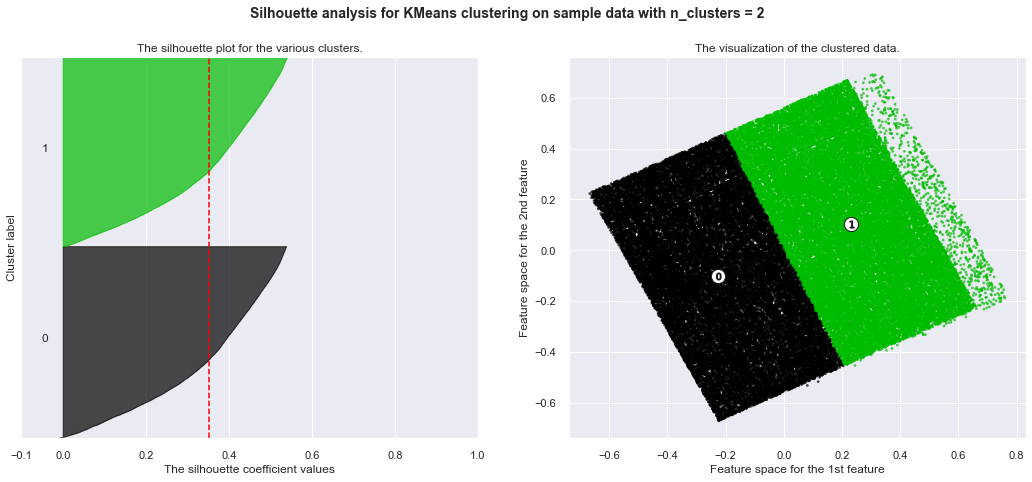

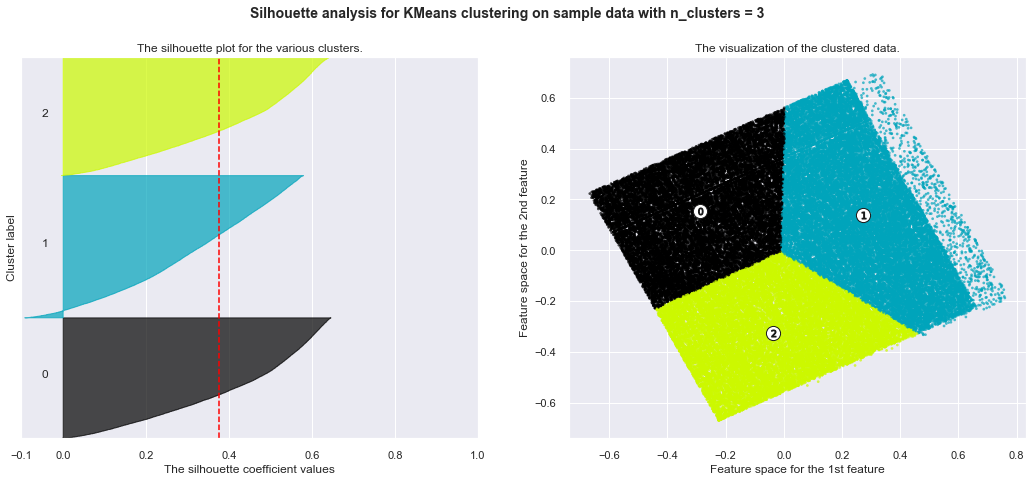

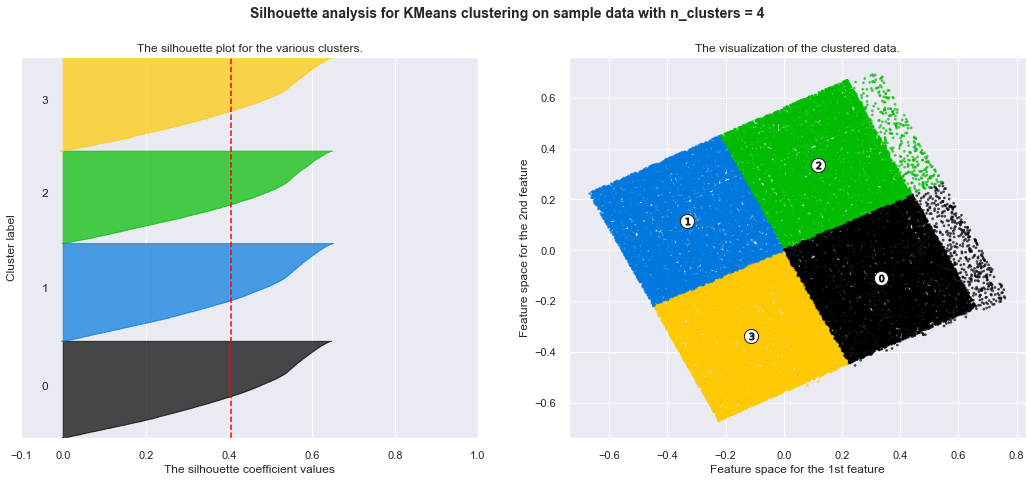

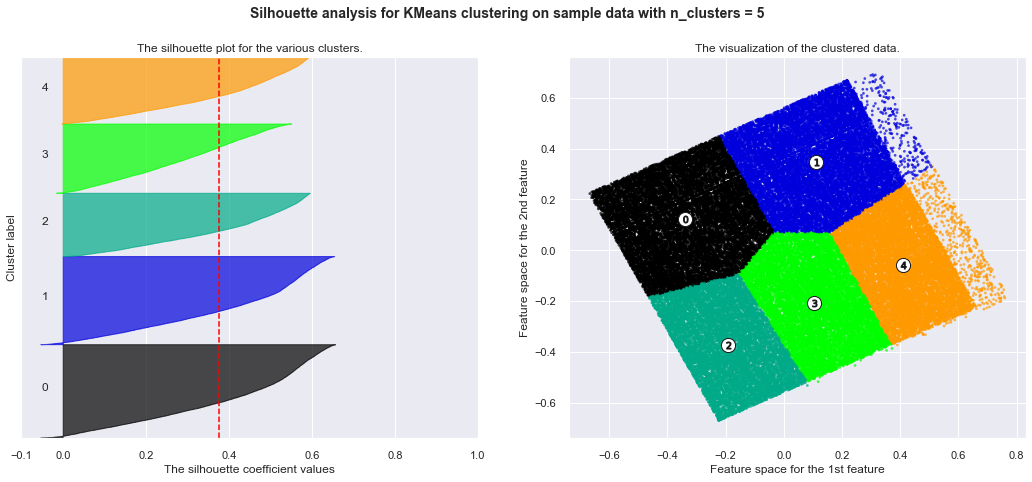

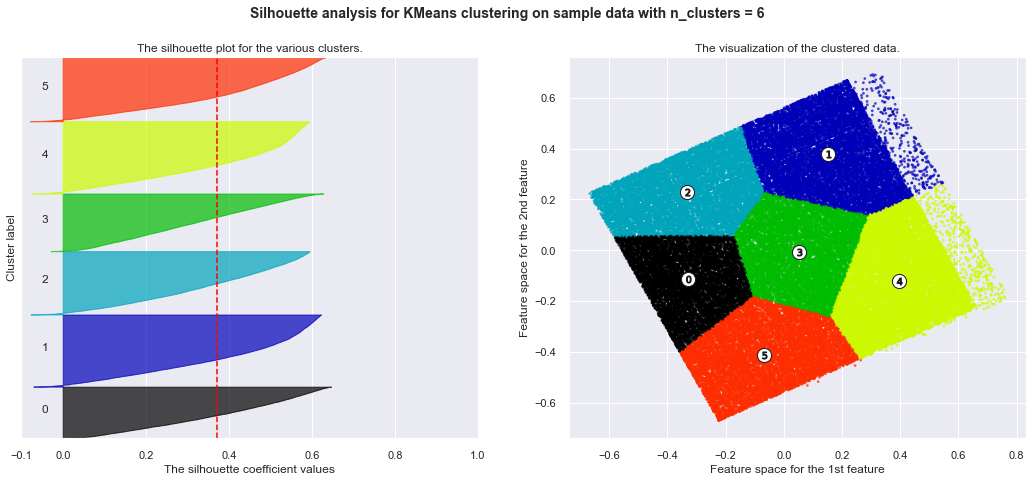

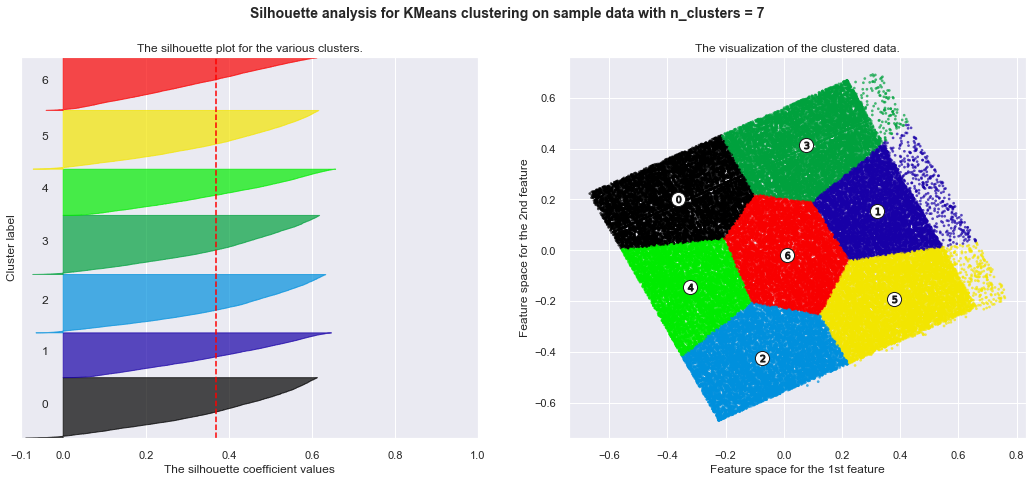

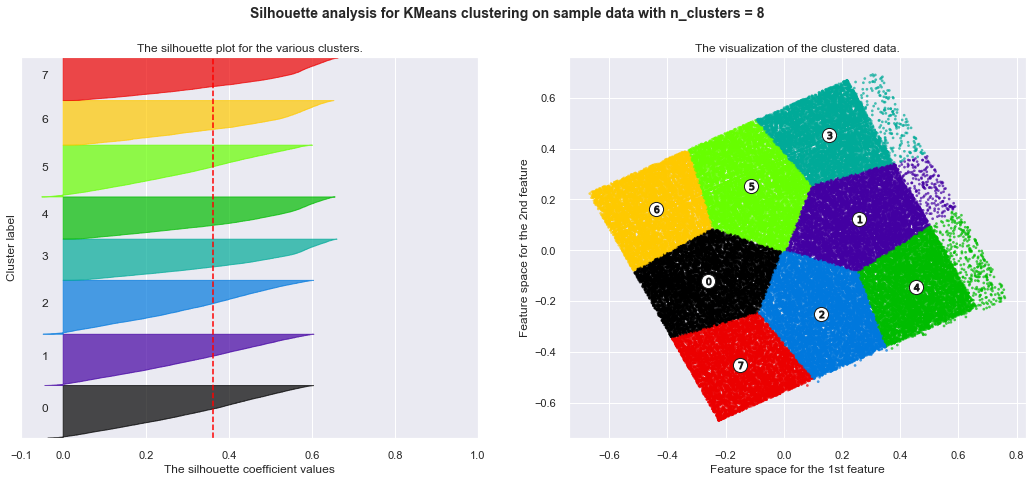

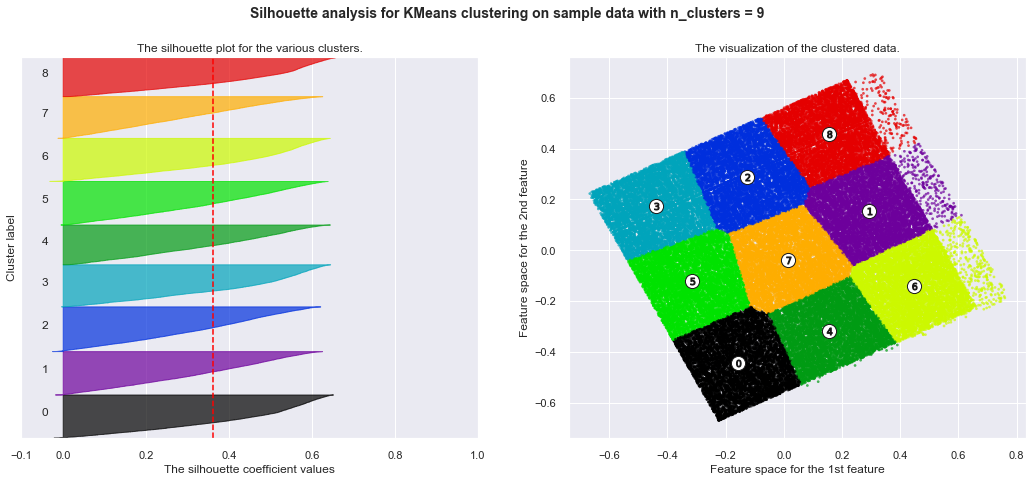

In [28]:
silhoutte_analysis(df_pca_reduced.values)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: disc;">
        <li><b>PCA reduced</b> The best score is for n_clusters = 4 The average silhouette_score is : 0.40</li>
    </ul> 
    <p>We also obtain that the reduced PCA dataset has clear clusters.</p>
    <p>So, from now on, we are going to use this setup.</p>
</div>

In [29]:
kmeans_reduced = KMeans(init="k-means++", n_clusters=4, max_iter=1000, random_state=10)

cluster_labels_reduced = kmeans_reduced.fit_predict(df_pca_reduced)
centroids_reduced = kmeans_reduced.cluster_centers_

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.3. Clusters in PCA</h3>
</div>

In [30]:
for key, value in DFs_ORIGINAL.items():
    
    globals()["X_projected_" + key] = globals()["pca_" + key].transform(globals()["X_" + key])

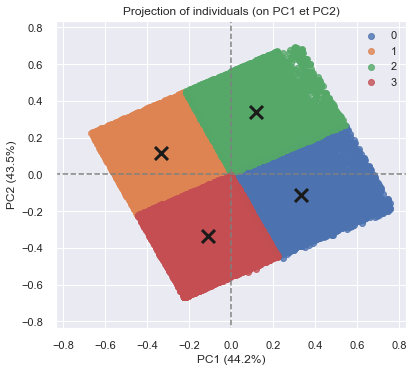

In [31]:
display_factorial_planes(X_projected_reduced, n_comp_reduced, pca_reduced, [(0,1),(2,3),(4,5)], 
                         illus_var=cluster_labels_reduced, lab_on=False, alpha=0.8)
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], marker="x", s=169, 
            linewidths=3, color="k", zorder=10)

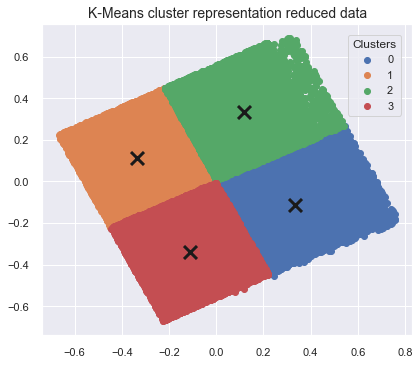

In [32]:
unique_labels = np.unique(cluster_labels_reduced)

plt.figure(figsize=(6, 5))
for i in unique_labels:
    plt.scatter(df_pca_reduced.values[cluster_labels_reduced==i, 0], 
                df_pca_reduced.values[cluster_labels_reduced==i, 1], 
                label=i)
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], marker="x", s=169, 
            linewidths=3, color="k", zorder=10)
plt.legend(loc="best", borderaxespad=1, title="Clusters", frameon=True, fancybox=True)
plt.tight_layout()
plt.title("K-Means cluster representation reduced data", size=14)
plt.savefig("images/kmeans-cluster-representation-pca-reduced.png")
plt.show()

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.4. Meaning of the Clusters</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's interpreting the meaning of each cluster based on the Parallel Coordinates Plot.</p>
</div>

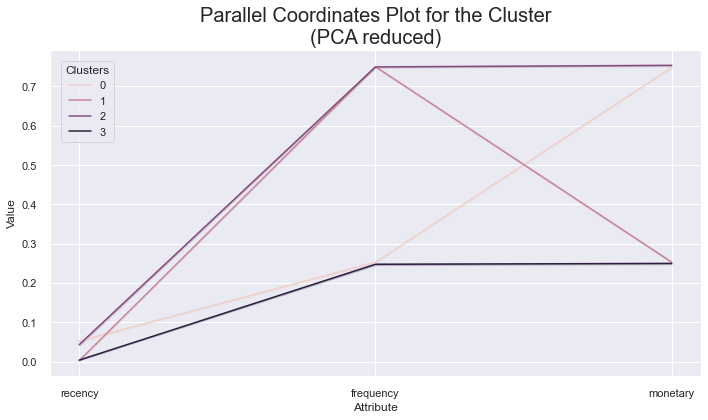

In [33]:
df_sample_scaled_reduced["ID"] = data_reduced.index
df_sample_scaled_reduced["Cluster"] = kmeans_reduced.labels_

df_reduced_melt = pd.melt(df_sample_scaled_reduced.reset_index(),
                          id_vars=["ID", "Cluster"],
                          value_vars=["recency", "frequency", "monetary"],
                          var_name="Attribute",
                          value_name="Value")

fig, ax1 = plt.subplots(figsize=(10, 6))
plt.title("Parallel Coordinates Plot for the Cluster\n(PCA reduced)", size=20)
sns.lineplot(x="Attribute", y="Value", hue="Cluster", data=df_reduced_melt, ax=ax1)
plt.legend(loc="best", borderaxespad=1, title="Clusters", frameon=True, fancybox=True)
plt.tight_layout()
plt.savefig("images/parallel-coordinates-plot-pca-reduced.png")
plt.show()
sns.despine(fig)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Based on the plot, we can say the following</p>
    <ul style="list-style-type: disc;">
        <li><b>Cluster 0</b> Customer who hasn't bought recently, only once and for a good amount of money.</li>
        <li><b>Cluster 1</b> Customer who bought recently, more than once and for a low amount of money.</li>
        <li><b>Cluster 2</b> Customer who hasn't bought recently, more than once and for a good amount of money.</li>
        <li><b>Cluster 3</b> Customer who bought recently, only once and for a low amount of money.</li>
    </ul> 
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.5. Intercluster Distance Maps</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to use the best score to plot the intercluster distance</p>
</div>

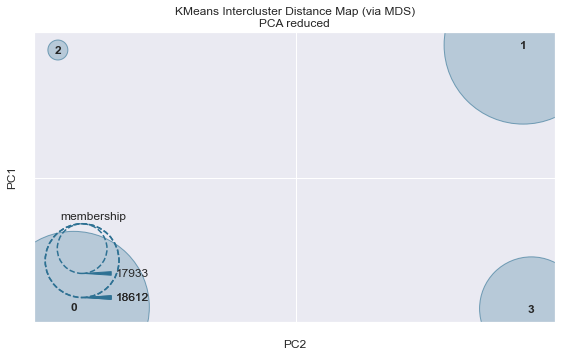

C:\Users\Samir\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



InterclusterDistance(ax=<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)\nPCA reduced'}, xlabel='PC2', ylabel='PC1'>,
                     model=None)

In [34]:
intercluster_distance(kmeans_reduced, df_pca_reduced.values, size=(672, 384), 
                      title="KMeans Intercluster Distance Map (via MDS)\nPCA reduced")

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>The clusters seem clear separeted</p>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">6. K-Means - (PCA complete)</h2>
</div>

<div class="alert alert-block alert-info">
    <p>Let's see in details the cluster for the dataset complete after doing the PCA</p>
    
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.1. Number of Cluster</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to use <b>internal information</b> to identify the the number of cluster. To do that, we are going to use the following metrics:</p>
    <ul style="list-style-type: disc;">
        <li><b>Within-Cluser-Sum of Squared Errors</b></li>
        <li><b>Davies-Bouldin score</b></li>
        <li><b>Silhouette score</b></li>
    </ul> 
</div>

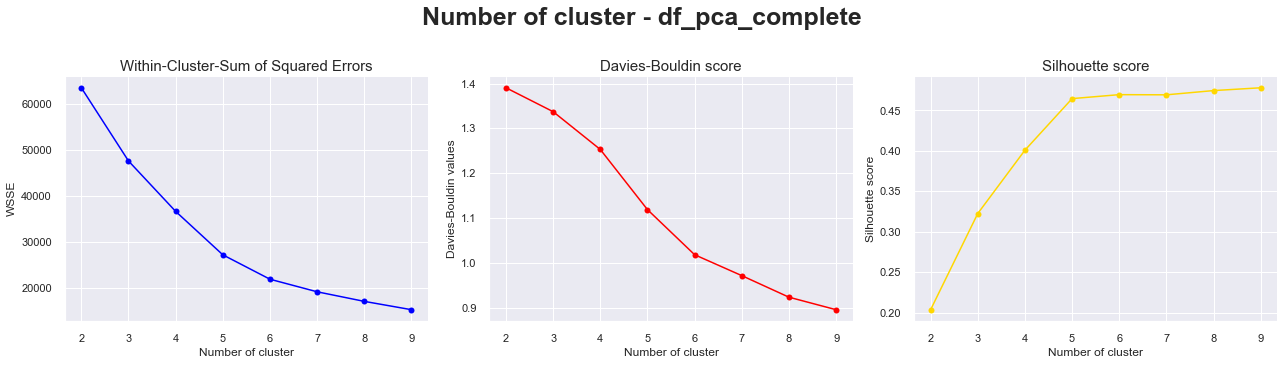

In [35]:
number_of_cluster(df_pca_complete, "df_pca_complete")

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: disc;">
        <li>For <b>dataset complete</b>, it is not clear the number of cluster. We can guess a number of cluster between 5 and 9.</li>
    </ul> 
    <p>For now, we are going to work with <b>Silhouette score</b> because it is the most informative, and we are going to work with the number of cluster higher or close to 1</p>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.2. Silhouette analysis</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's go deeper into the Silhoutte analysis</p>
</div>

For n_clusters = 2 The average silhouette_score is : 0.20388522732084674
For n_clusters = 3 The average silhouette_score is : 0.3227257009154822
For n_clusters = 4 The average silhouette_score is : 0.4009618090959533
For n_clusters = 5 The average silhouette_score is : 0.4646766527291698
For n_clusters = 6 The average silhouette_score is : 0.46955771592323314
For n_clusters = 7 The average silhouette_score is : 0.4693509987403688
For n_clusters = 8 The average silhouette_score is : 0.4745883218350194
For n_clusters = 9 The average silhouette_score is : 0.47805157080798855


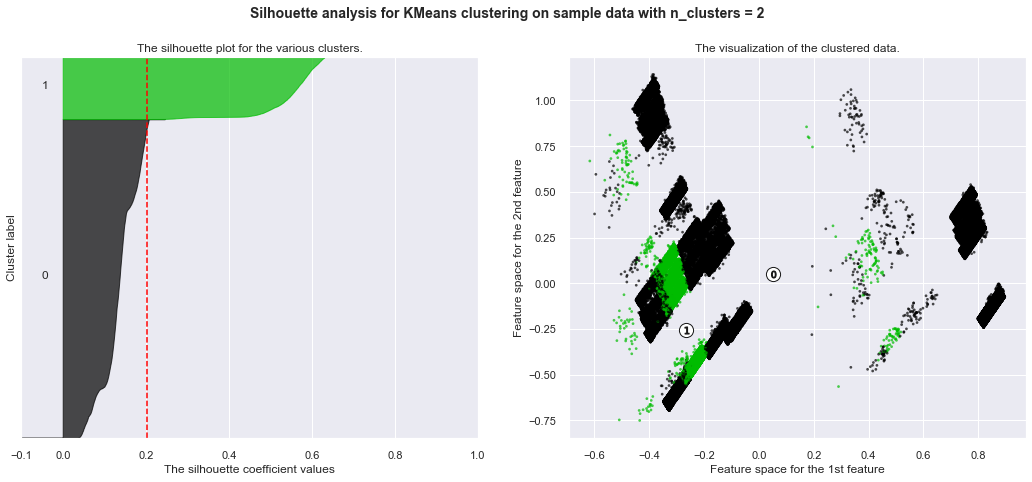

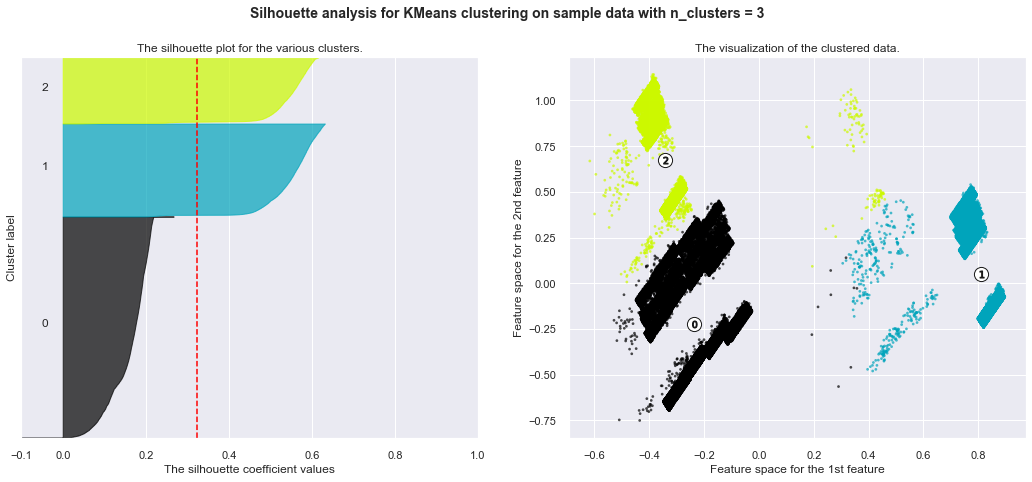

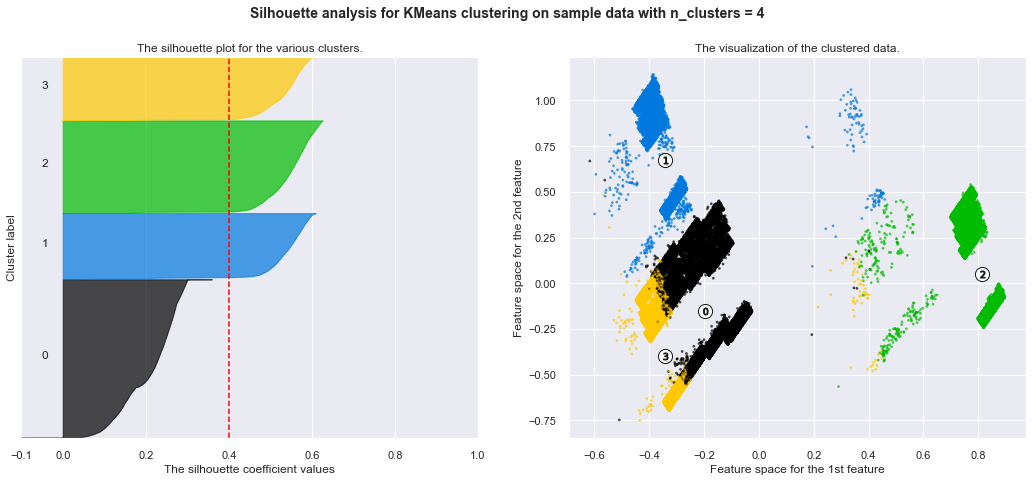

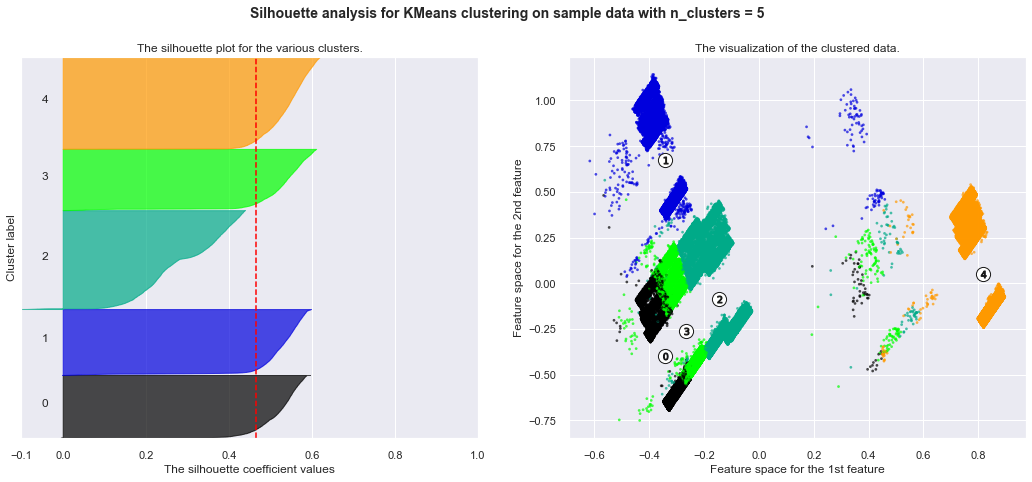

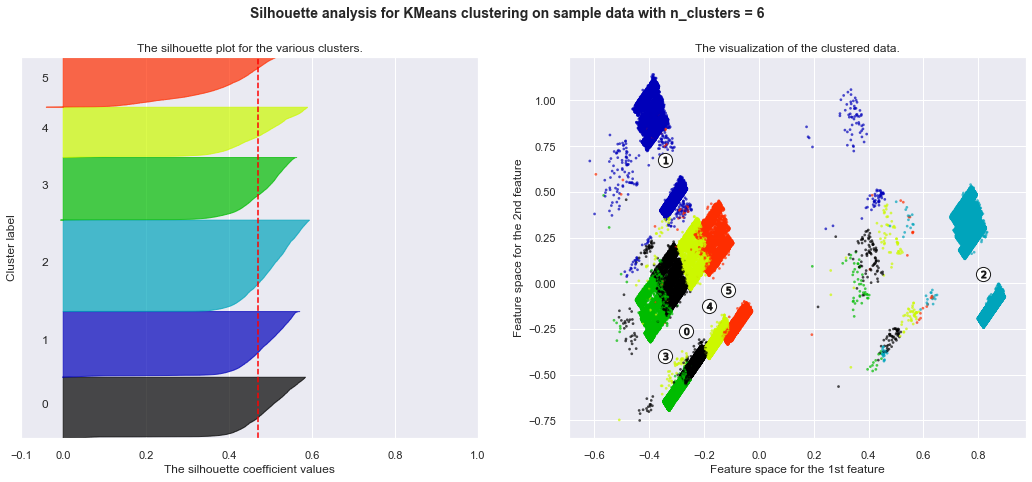

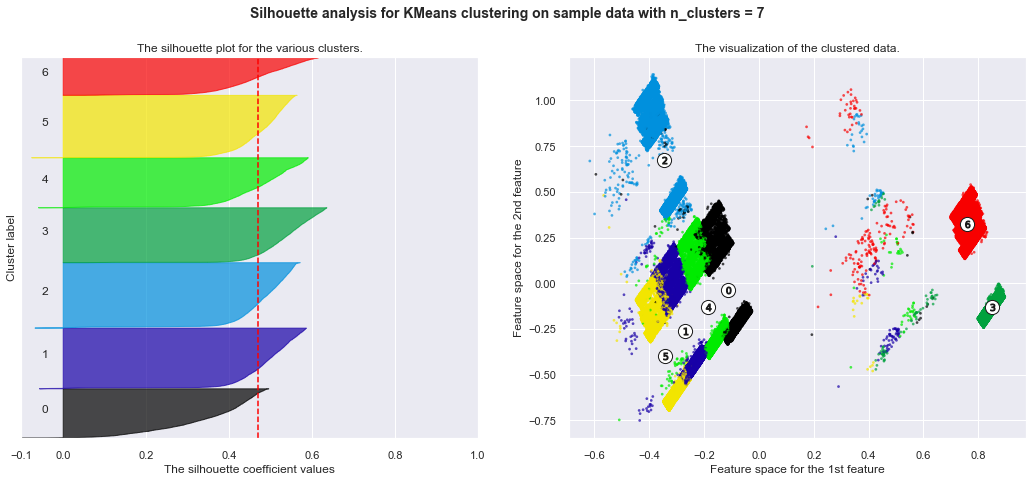

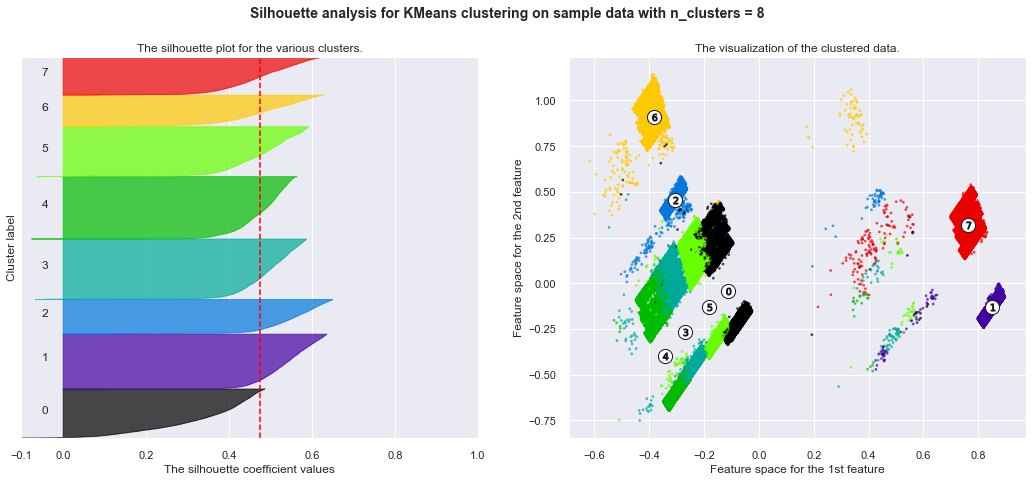

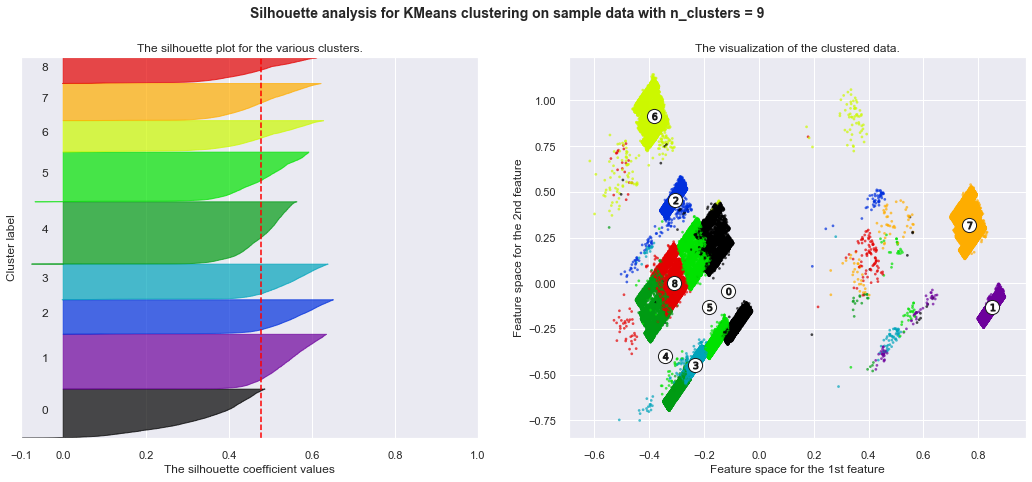

In [36]:
silhoutte_analysis(df_pca_complete.values)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: disc;">
        <li><b>PCA complete</b> The best score is for n_clusters = 9 The average silhouette_score is : 0.478</li>
    </ul> 
    <p>But, the results are very similar between 5 and 9 clusters.</p>
    <p>So, from now on, we are going to use this setup.</p>
</div>

In [37]:
kmeans_complete = KMeans(init="k-means++", n_clusters=9, max_iter=1000, random_state=10)

cluster_labels_complete = kmeans_complete.fit_predict(df_pca_complete)
centroids_complete = kmeans_complete.cluster_centers_

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.3. Clusters in PCA</h3>
</div>

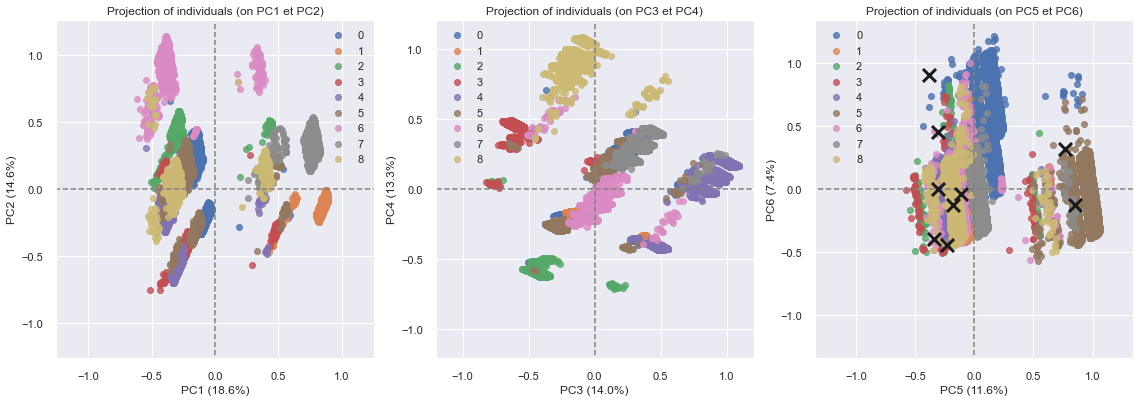

In [38]:
display_factorial_planes(X_projected_complete, n_comp_complete, pca_complete, [(0,1),(2,3),(4,5)], 
                         illus_var=cluster_labels_complete, lab_on=False, alpha=0.8)
plt.scatter(centroids_complete[:, 0], centroids_complete[:, 1], marker="x", s=169, 
            linewidths=3, color="k", zorder=10)

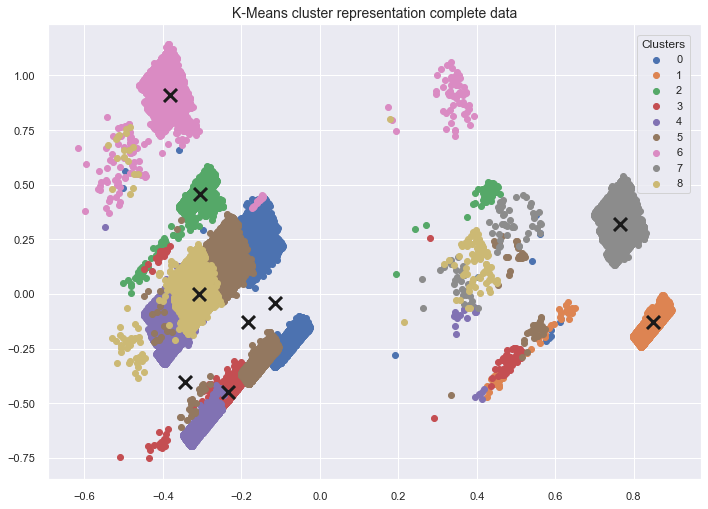

In [39]:
unique_labels = np.unique(cluster_labels_complete)

plt.figure(figsize=(10, 7))
for i in unique_labels:
    plt.scatter(df_pca_complete.values[cluster_labels_complete==i, 0], 
                df_pca_complete.values[cluster_labels_complete==i, 1], 
                label=i)
plt.scatter(centroids_complete[:, 0], centroids_complete[:, 1], marker="x", s=169, 
            linewidths=3, color="k", zorder=10)
plt.legend(loc="best", borderaxespad=1, title="Clusters", frameon=True, fancybox=True)
plt.tight_layout()
plt.title("K-Means cluster representation complete data", size=14)
plt.savefig("images/kmeans-cluster-representation-pca-complete.png")
plt.show()

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.4. Meaning of the Clusters</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's interpreting the meaning of each cluster based on the Parallel Coordinates Plot.</p>
</div>

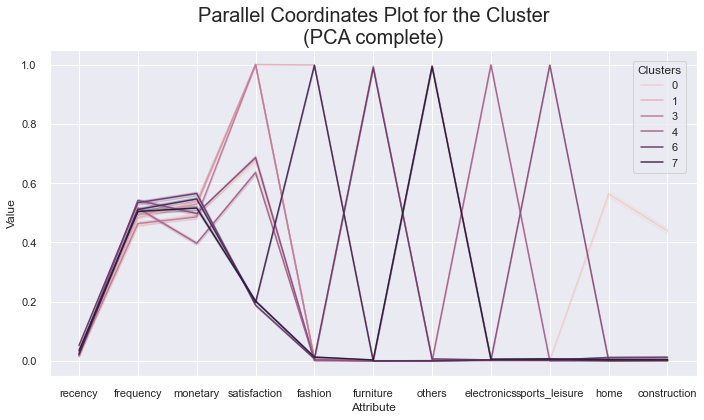

In [40]:
df_sample_scaled_complete["ID"] = data_complete.index
df_sample_scaled_complete["Cluster"] = kmeans_complete.labels_

df_complete_melt = pd.melt(df_sample_scaled_complete.reset_index(),
                          id_vars=["ID", "Cluster"],
                          value_vars=["recency", "frequency", "monetary", "satisfaction", "fashion",
                                     "furniture", "others", "electronics", "sports_leisure", "home", 
                                     "construction"],
                          var_name="Attribute",
                          value_name="Value")

fig, ax1 = plt.subplots(figsize=(10, 6))
plt.title("Parallel Coordinates Plot for the Cluster\n(PCA complete)", size=20)
sns.lineplot(x="Attribute", y="Value", hue="Cluster", data=df_complete_melt, ax=ax1)
plt.legend(loc="best", borderaxespad=1, title="Clusters", frameon=True, fancybox=True)
plt.tight_layout()
plt.savefig("images/parallel-coordinates-plot-pca-complete.png")
plt.show()
sns.despine(fig)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Here, we can see customer who bought more than one category but, this graph is not totally clear.</p>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.5. Intercluster Distance Maps</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to use the best score to plot the intercluster distance</p>
</div>

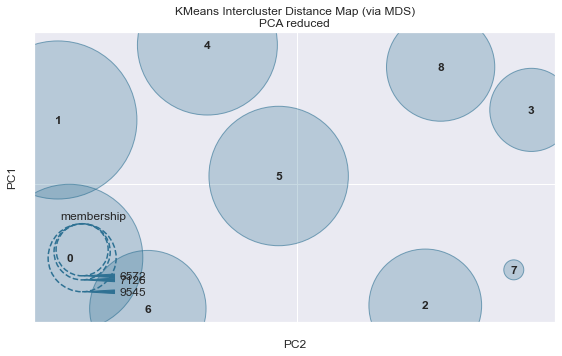

C:\Users\Samir\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



InterclusterDistance(ax=<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)\nPCA reduced'}, xlabel='PC2', ylabel='PC1'>,
                     model=None)

In [41]:
intercluster_distance(KMeans(init="k-means++", n_clusters=9, n_init=4, max_iter=1000, random_state=10),
                      df_pca_complete.values, size=(672, 384), 
                      title="KMeans Intercluster Distance Map (via MDS)\nPCA reduced")

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>The clusters do not seem clear separeted</p>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">7. Selecting the model</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">7.1. Benchmarking based on internal information</h3>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to analyze the two models through <b>internal information</b> to select the best model. <br>
        Because we don't have real information(true labels) to compare our results.</p>
    <p>To do that, we are going to use the following <b>Cluster quality metrics:</p>
    <ul style="list-style-type: disc;">
        <li><b>Inertia</b>: </li>
        <li><b>Calinski and Harabasz</b>: </li>
        <li><b>Davies-Bouldin</b>: </li>
        <li><b>Silhouette </b>: </li>
    </ul> 
    <p>Let's analyze the two models</p>
</div>

In [42]:
print(100 * '_')
print("{:<15} {:<10} {:<8} {:<10} {:<20} {:<16} {:<11}".format("dataset", "clusters", "time", 
                                                               "inertia", "calinski-harabasz", 
                                                               "davies-bouldin", "silhouette"))

# kmeans = KMeans(init="k-means++", n_clusters=4, max_iter=1000, random_state=10)
benchmark_kmeans("PCA-reduced", kmeans_reduced, n_clusters=4, data=df_pca_reduced.values)

# kmeans = KMeans(init="k-means++", n_clusters=9, max_iter=1000, random_state=10)
benchmark_kmeans("PCA-complete", kmeans_complete, n_clusters=9, data=df_pca_complete.values)

____________________________________________________________________________________________________
dataset         clusters   time     inertia    calinski-harabasz    davies-bouldin   silhouette 
PCA-reduced     4          2.577s     3076        72548.351           0.770              0.404 
PCA-complete    9          1.372s    15178        36125.872           0.896              0.478 


<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Most of the metrics are better for <b>PCA reduced</b>. Only silhouette score is better for PCA complete.</p>
    <p>Despite that, we are going to select to model based on <b>PCA reduced</b> to continue</p>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">7.2. Plotting of Cluster with Spider plot</h3>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to add the cluster into the datasets initial to plot each cluster through a spider plot</p>
</div>

In [43]:
data_reduced["cluster"] = cluster_labels_reduced

In [44]:
data_reduced.head(3)

recency  frequency  monetary  cluster
0      115      False    141.90        0
1      325      False     43.62        1
2      292      False    196.89        2

In [45]:
CLUSTER_CATEGORIES = {
    0 : "Cluster 0",
    1 : "Cluster 1",
    2 : "Cluster 2",
    3 : "Cluster 3"
}

In [46]:
data_reduced["cluster_label"] = data_reduced["cluster"]

In [47]:
data_reduced["cluster_label"] = data_reduced["cluster_label"].replace(CLUSTER_CATEGORIES)

In [48]:
data_reduced.head()

recency  frequency  monetary  cluster cluster_label
0      115      False    141.90        0     Cluster 0
1      325      False     43.62        1     Cluster 1
2      292      False    196.89        2     Cluster 2
3      150      False    166.98        0     Cluster 0
4      135      False     35.38        3     Cluster 3

In [49]:
rfm_sns_palette = sns.color_palette("husl", data_reduced["cluster_label"].nunique())
rfm_colors = {label : color for label, color in zip(data_reduced["cluster_label"].unique(), rfm_sns_palette.as_hex())}

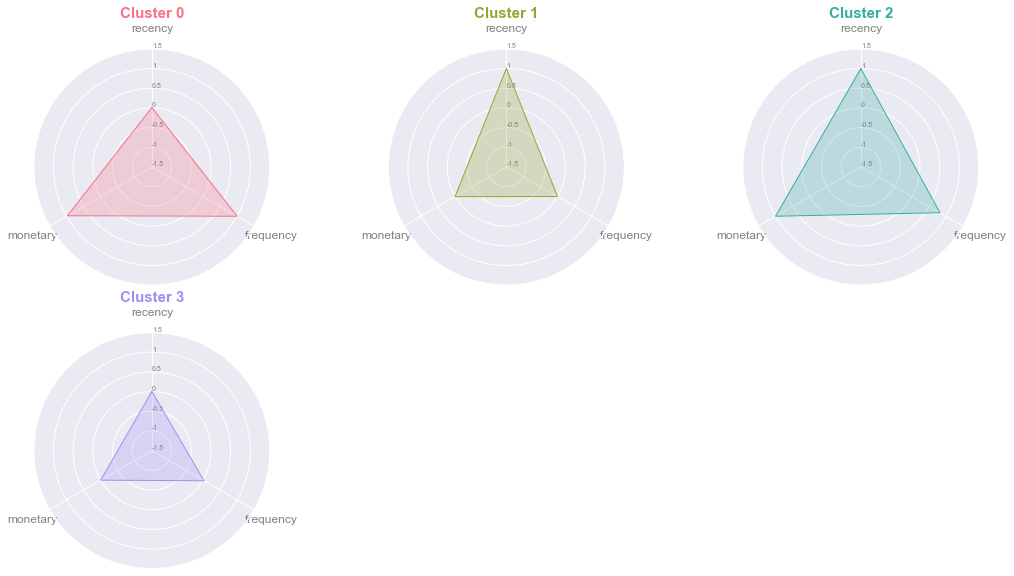

In [50]:
df_spider_RFM(data_reduced[["recency", "frequency", "monetary", "cluster_label"]], "cluster_label", rfm_colors)

In [51]:
del data_reduced["cluster_label"]

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Based on the plot, we can say the following</p>
    <ul style="list-style-type: disc;">
        <li><b>Cluster 0</b> Customer who bought recently, more than once for a good amount of money.</li>
        <li><b>Cluster 1</b> Customer who hasn't bought recently, only once and for a low amount of money.</li>
        <li><b>Cluster 2</b> Customer who hasn't bought recently, more than once for a good amount of money.</li>
        <li><b>Cluster 3</b> Customer who bought recently, only once and for a low amount of money.</li>
    </ul> 
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">7.3. Cluster stability</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Finally, we are going to verify the cluster stability.</p>
    <p>To do that, we are going to do the following steps:</p>
    <ul style="list-style-type: disc;">
        <li>Data preprocessing</li>
        <li>PCA</li>
        <li>KMeans</li>
        <li>ARI score</li>
    </ul> 
    <p>For datasets belows:</p>
    <ul style="list-style-type: square;">
        <li><b>minus 2 months</b> from 2017-07-03 to 2018-07-03</li>
        <li><b>minus 4 months</b> from 2017-05-03 to 2018-05-03</li>
        <li><b>minus 6 months</b> from 2017-03-03 to 2018-03-03</li>
        <li><b>minus 8 months</b> from 2017-01-03 to 2018-01-03</li>
        <li><b>minus 10 months</b> from 2016-11-03 to 2017-11-03</li>
    </ul>    
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">7.3.1. Data preprocessing</h4>
</div>

<div class="alert alert-block alert-info">
     <p>Importing datasets with shifted information</p>
</div>

In [52]:
for i in range(2, 12, 2):
    
    globals()["data_" + str(i) + "_months"] = pd.read_csv(r"datasets\data_to_model_" + str(i) + "_months.csv")
    
    globals()["df_data_" + str(i) + "_months"] = globals()["data_" + str(i) + "_months"][["recency", "frequency", "monetary"]].copy()

In [53]:
df_data_2_months.head()

recency  frequency  monetary
0       53      False    141.90
1      263      False     43.62
2      230      False    196.89
3       88      False    166.98
4       73      False     35.38

<div class="alert alert-block alert-info">
     <p>Making the data preprocessing</p>
</div>

In [54]:
for i in range(2, 12, 2):
    
    BOOLEAN_FEATURES = ["frequency"]
    NUMERICAL_FEATURES = ["recency", "monetary"]
    
    boolean_pipeline = make_pipeline(FunctionTransformer(boolean_transformation))

    numerical_pipeline = make_pipeline(QuantileTransformer(random_state=42, output_distribution="uniform"))
    
    preprocessor = make_column_transformer(
                (boolean_pipeline, BOOLEAN_FEATURES), 
                (numerical_pipeline, NUMERICAL_FEATURES)
    )
    
    globals()["data_sample_scaled_" + str(i) + "_months"] = preprocessor.fit_transform(globals()["df_data_" + str(i) + "_months"])
    
    globals()["df_sample_scaled_" + str(i) + "_months"] = pd.DataFrame(globals()["data_sample_scaled_" + str(i) + "_months"],
                                                                       index=globals()["df_data_" + str(i) + "_months"].index,
                                                                       columns=globals()["df_data_" + str(i) + "_months"].columns)

In [55]:
df_sample_scaled_2_months.head()

recency  frequency  monetary
0      0.0   0.152653  0.640311
1      0.0   0.807307  0.121566
2      0.0   0.738238  0.792307
3      0.0   0.273273  0.721271
4      0.0   0.224725  0.065870

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">7.3.2. PCA</h4>
</div>

<div class="alert alert-block alert-info">
     <p>Making the PCA and selecting the 85% of the variance</p>
</div>

In [56]:
var_threshold = 0.85

for i in range(2, 12, 2):
    
    # Selecting the features to analyse with PCA and 
    # be able to transform to Dataset after making the PCA
    globals()["X_" + str(i) + "_months"] = globals()["df_sample_scaled_" + str(i) + "_months"].values
    globals()["index_values_" + str(i) + "_months"] = globals()["df_sample_scaled_" + str(i) + "_months"].index
    
    # Processing the PCA
    globals()["pca_" + str(i) + "_months"] = decomposition.PCA()
    globals()["pca_" + str(i) + "_months"].fit(globals()["X_" + str(i) + "_months"])
    
    # Getting the explained variance ratio for each principal component
    globals()["scree_" + str(i) + "_months"] = globals()["pca_" + str(i) + "_months"].explained_variance_ratio_
    
    # Getting the number of principal components to reach variance thresholds
    globals()["mask_" + str(i) + "_months"] = globals()["scree_" + str(i) + "_months"].cumsum() > var_threshold
    globals()["nb_selected_components_" + str(i) + "_months"] =\
                len(globals()["scree_" + str(i) + "_months"][~globals()["mask_" + str(i) + "_months"]]) + 1
    
    # Compute and displays the actual ratio of explained variance
    globals()["explained_variance_sum_" + str(i) + "_months"] =\
                globals()["scree_" + str(i) + "_months"].cumsum()[globals()["nb_selected_components_" + str(i) + "_months"]-1]
    
    # Getting the projection of the data on the first components
    globals()["X_PCA_" + str(i) + "_months"] = globals()["pca_" + str(i) + "_months"]\
                                                    .transform(globals()["X_" + str(i) + "_months"])\
                                                        [:,:globals()["nb_selected_components_" + str(i) + "_months"]]    
    
    COL_TO_PC =  ["PC" + str(i + 1) for i in range(globals()["nb_selected_components_" + str(i) + "_months"])]
    globals()["df_pca_" + str(i) + "_months"] = pd.DataFrame(data=globals()["X_PCA_" + str(i) + "_months"],
                                                             columns=COL_TO_PC, 
                                                             index=globals()["index_values_" + str(i) + "_months"])
    
    print("-- Dataset (minus " + str(i) + " months)" + " components --")
    print("Number of selected components:", globals()["nb_selected_components_" + str(i) + "_months"])
    print("Cumulative explained variance:  {:.2f}%".format(globals()["explained_variance_sum_" + str(i) + "_months"]*100))
    print("Shape: " + str(globals()["df_pca_" + str(i) + "_months"].shape))
    print("\n")

-- Dataset (minus 2 months) components --
Number of selected components: 2
Cumulative explained variance:  86.96%
Shape: (69048, 2)


-- Dataset (minus 4 months) components --
Number of selected components: 2
Cumulative explained variance:  86.48%
Shape: (63145, 2)


-- Dataset (minus 6 months) components --
Number of selected components: 2
Cumulative explained variance:  86.10%
Shape: (54331, 2)


-- Dataset (minus 8 months) components --
Number of selected components: 2
Cumulative explained variance:  86.35%
Shape: (43319, 2)


-- Dataset (minus 10 months) components --
Number of selected components: 2
Cumulative explained variance:  86.49%
Shape: (30640, 2)




<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">7.3.3. KMeans</h4>
</div>

<div class="alert alert-block alert-info">
     <p>KMeans for shifted information</p>
</div>

In [57]:
for i in range(2, 12, 2):
    
    globals()["cluster_labels_" + str(i) + "_months"] = kmeans_reduced.fit_predict(globals()["df_pca_" + str(i) + "_months"])

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">7.3.4. ARI score</h4>
</div>

<div class="alert alert-block alert-info">
     <p>Merging cluster with customer id to compare datasets</p>
</div>

In [58]:
df_data_0_months = data_reduced.merge(df_data["customer_unique_id"], left_index=True, right_index=True)


df_data_0_months= df_data_0_months[["customer_unique_id", "recency", "frequency", "monetary", "cluster"]]

df_data_0_months["cluster_label"] = df_data_0_months["cluster"]
df_data_0_months["cluster_label"] = df_data_0_months["cluster_label"].replace(CLUSTER_CATEGORIES)

df_data_0_months.head()

customer_unique_id  recency  frequency  monetary  cluster  \
0  0000366f3b9a7992bf8c76cfdf3221e2      115      False    141.90        0   
1  0000f6ccb0745a6a4b88665a16c9f078      325      False     43.62        1   
2  0004aac84e0df4da2b147fca70cf8255      292      False    196.89        2   
3  0004bd2a26a76fe21f786e4fbd80607f      150      False    166.98        0   
4  00050ab1314c0e55a6ca13cf7181fecf      135      False     35.38        3   

  cluster_label  
0     Cluster 0  
1     Cluster 1  
2     Cluster 2  
3     Cluster 0  
4     Cluster 3

In [59]:
for i in range(10, 0, -2):
    
    globals()["df_data_" + str(i) + "_months"] = globals()["df_data_" + str(i) + "_months"]\
                                                    .merge(globals()["data_" + str(i) + "_months"]["customer_unique_id"],
                                                          left_index=True, right_index=True)
    
    globals()["df_data_" + str(i) + "_months"] = globals()["df_data_" + str(i) + "_months"]\
                                                        [["customer_unique_id", "recency", "frequency", "monetary"]]
    
    globals()["df_data_" + str(i) + "_months"]["cluster"] = globals()["cluster_labels_" + str(i) + "_months"]
    
    globals()["df_data_" + str(i) + "_months"]["cluster_label"] = globals()["df_data_" + str(i) + "_months"]["cluster"]
    globals()["df_data_" + str(i) + "_months"]["cluster_label"] = globals()["df_data_" + str(i) + "_months"]["cluster_label"]\
                                                                        .replace(CLUSTER_CATEGORIES)
    
    print("df_data_" + str(i) + "_months")
    print(globals()["df_data_" + str(i) + "_months"].shape, "\n")

df_data_10_months
(30640, 6) 

df_data_8_months
(43319, 6) 

df_data_6_months
(54331, 6) 

df_data_4_months
(63145, 6) 

df_data_2_months
(69048, 6) 



In [60]:
df_data_2_months.head()

customer_unique_id  recency  frequency  monetary  cluster  \
0  0000366f3b9a7992bf8c76cfdf3221e2       53      False    141.90        0   
1  0000f6ccb0745a6a4b88665a16c9f078      263      False     43.62        1   
2  0004aac84e0df4da2b147fca70cf8255      230      False    196.89        2   
3  0004bd2a26a76fe21f786e4fbd80607f       88      False    166.98        0   
4  00050ab1314c0e55a6ca13cf7181fecf       73      False     35.38        3   

  cluster_label  
0     Cluster 0  
1     Cluster 1  
2     Cluster 2  
3     Cluster 0  
4     Cluster 3

<div class="alert alert-block alert-info">
    <p>Identifying the customer presents in  <b>dataset reduced</b> who are into the others datasets</p>
    <p>Also, we are going to define our dataset initial (from 2017-09-03 to 2018-09-03) as "label_pred" and<br> 
        the shifted 2 months dataset as "label_true"</p>
</div>

In [61]:
print("Customers in commun")
print("-"*20 + "\n")

for i in range(10, 0, -2):
    
    globals()["df_0_vs_" + str(i)] = pd.merge(df_data_0_months, 
                                              globals()["df_data_" + str(i) + "_months"],
                                              how="inner",
                                              on=["customer_unique_id"])
    
    globals()["df_0_vs_" + str(i)].drop(columns=["recency_x", "frequency_x", "monetary_x",
                                                "recency_y", "frequency_y", "monetary_y"],
                                       axis=1, inplace=True)
    
    globals()["df_0_vs_" + str(i)].rename(columns={
        "cluster_x" : "labels_pred",
        "cluster_label_x" : "cluster_label_pred",
        "cluster_y" : "labels_true",
        "cluster_label_y" : "cluster_label_true"        
    }, inplace=True)
    
    print("df_0_vs_" + str(i))
    print(globals()["df_0_vs_" + str(i)].shape, "\n")

Customers in commun
--------------------

df_0_vs_10
(9008, 5) 

df_0_vs_8
(21687, 5) 

df_0_vs_6
(35232, 5) 

df_0_vs_4
(48869, 5) 

df_0_vs_2
(61176, 5) 



In [62]:
df_0_vs_2.head()

customer_unique_id  labels_pred cluster_label_pred  \
0  0000366f3b9a7992bf8c76cfdf3221e2            0          Cluster 0   
1  0000f6ccb0745a6a4b88665a16c9f078            1          Cluster 1   
2  0004aac84e0df4da2b147fca70cf8255            2          Cluster 2   
3  0004bd2a26a76fe21f786e4fbd80607f            0          Cluster 0   
4  00050ab1314c0e55a6ca13cf7181fecf            3          Cluster 3   

   labels_true cluster_label_true  
0            0          Cluster 0  
1            1          Cluster 1  
2            2          Cluster 2  
3            0          Cluster 0  
4            3          Cluster 3

<div class="alert alert-block alert-info">
    <p>Calculating <b>ARI</b> for shifted information</p>
</div>

In [63]:
RESUL_ARI = []
for i in range(10, 0, -2):
    
    print("Last year vs shifted " + str(i) + " months before")
    result = adjusted_rand_score(globals()["df_0_vs_" + str(i)]["labels_true"],
                             globals()["df_0_vs_" + str(i)]["labels_pred"])
    
    RESUL_ARI.append(result)
    print(result)
    print("-"*40)

Last year vs shifted 10 months before
0.8658468250700333
----------------------------------------
Last year vs shifted 8 months before
0.9286487982225944
----------------------------------------
Last year vs shifted 6 months before
0.5883179596788796
----------------------------------------
Last year vs shifted 4 months before
0.4008088163223081
----------------------------------------
Last year vs shifted 2 months before
0.6278736720664401
----------------------------------------


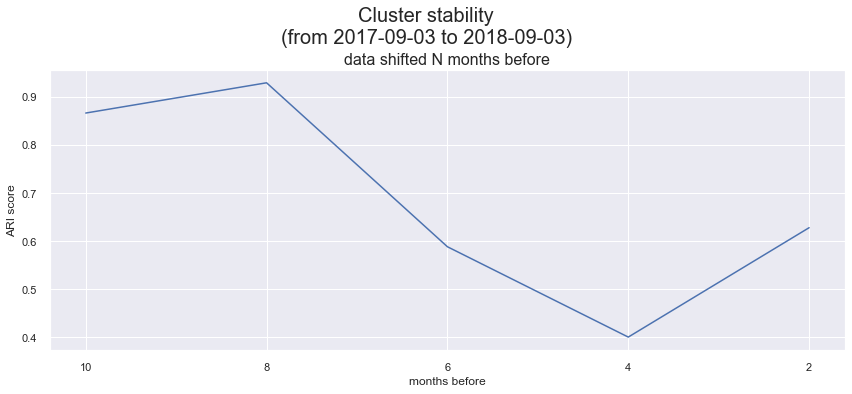

In [64]:
fig = plt.subplots(figsize=(12, 6))
sns.lineplot(y=RESUL_ARI, x=["10", "8", "6", "4", "2"])
plt.xlabel("months before", size=12)
plt.ylabel("ARI score", size=12)
plt.suptitle("Cluster stability\n(from 2017-09-03 to 2018-09-03)", size=20, y=0.91)
plt.title("\ndata shifted N months before", size=16)
plt.tight_layout()
plt.savefig("images/stability.png")
plt.show()

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">7.3.5. Customer flow between segments</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Identifying the customer presents in  <b>dataset reduced</b> who are into the others datasets</p>
</div>

In [65]:
for i in range(2, 12, 2):
    
    globals()["df_sankey_0_vs_" + str(i)] = pd.merge(df_data_0_months, 
                                              globals()["df_data_" + str(i) + "_months"],
                                              how="inner",
                                              on=["customer_unique_id"])
    
    globals()["df_sankey_0_vs_" + str(i)] = globals()["df_sankey_0_vs_" + str(i)]\
                                                [["customer_unique_id", "cluster_y", "cluster_label_y", 
                                                  "cluster_x", "cluster_label_x"]]
    
    globals()["df_sankey_0_vs_" + str(i)].rename(columns={
        "cluster_x" : "labels_pred",
        "cluster_label_x" : "cluster_final",
        "cluster_y" : "labels_true",
        "cluster_label_y" : "cluster_initial" 
    }, inplace=True)

In [66]:
df_sankey_0_vs_10.head()

customer_unique_id  labels_true cluster_initial  labels_pred  \
0  000bfa1d2f1a41876493be685390d6d3            1       Cluster 1            1   
1  0012929d977a8d7280bb277c1e5f589d            0       Cluster 0            2   
2  00293787e2aec37a9c253b63fdfe2049            0       Cluster 0            2   
3  0029bd580d3012618731f5abb174a07f            1       Cluster 1            1   
4  002ae492472e45ad6ebeb7a625409392            0       Cluster 0            2   

  cluster_final  
0     Cluster 1  
1     Cluster 2  
2     Cluster 2  
3     Cluster 1  
4     Cluster 2

In [67]:
print("% customers who have changed of segment in the last\n")
for i in range(2, 12, 2):
    
    globals()["df_sankey_0_vs_" + str(i)]["comparison_segment"] =\
                        np.where(globals()["df_sankey_0_vs_" + str(i)]["labels_true"] == globals()["df_sankey_0_vs_" + str(i)]["labels_pred"],
                                True, False)
    
    
    customers_flow = globals()["df_sankey_0_vs_" + str(i)][globals()["df_sankey_0_vs_" + str(i)]["comparison_segment"] == False].shape[0]
    total_customer = globals()["df_sankey_0_vs_" + str(i)].shape[0]
    
    print("- " + str(i) + " months")
    print("% " + str(round((customers_flow / total_customer) * 100, 2)) + "\n")

% customers who have changed of segment in the last

- 2 months
% 17.04

- 4 months
% 60.4

- 6 months
% 88.4

- 8 months
% 98.76

- 10 months
% 51.02



<div class="alert alert-block alert-info">
    <p>Grouping by cluster initial and cluster final</p>
</div>

In [68]:
for i in range(2, 12, 2):
    
    globals()["df_sankey_0_vs_" + str(i) + "_grouped"] = pd.DataFrame(globals()["df_sankey_0_vs_" + str(i)]\
                                                                      .groupby(["cluster_initial", "cluster_final"])\
                                                                      ["customer_unique_id"].count())
    
    globals()["df_sankey_0_vs_" + str(i) + "_grouped"].reset_index(inplace=True)
    globals()["df_sankey_0_vs_" + str(i) + "_grouped"].rename(columns={"customer_unique_id":"value"}, inplace=True)
    
df_sankey_0_vs_10_grouped.head(10)

cluster_initial cluster_final  value
0       Cluster 0     Cluster 0     87
1       Cluster 0     Cluster 1     82
2       Cluster 0     Cluster 2   4140
3       Cluster 0     Cluster 3     13
4       Cluster 1     Cluster 0     62
5       Cluster 1     Cluster 1   4254
6       Cluster 1     Cluster 2     70
7       Cluster 1     Cluster 3     21
8       Cluster 2     Cluster 0     43
9       Cluster 2     Cluster 1     34

In [69]:
for i in range(2, 12, 2):
    
    globals()["df_sankey_0_vs_" + str(i) + "_pivoted"] = pd.pivot_table(globals()["df_sankey_0_vs_" + str(i) + "_grouped"],
                                                                        values="value", index="cluster_initial",
                                                                        columns="cluster_final")
    
    globals()["df_sankey_0_vs_" + str(i) + "_pivoted"].fillna(0, inplace=True)
    globals()["df_sankey_0_vs_" + str(i) + "_pivoted"].reset_index(inplace=True)
    globals()["df_sankey_0_vs_" + str(i) + "_pivoted"].columns = pd.Index(list(globals()["df_sankey_0_vs_" + str(i) + "_pivoted"]\
                                                                               .columns))
df_sankey_0_vs_10_pivoted

cluster_initial  Cluster 0  Cluster 1  Cluster 2  Cluster 3
0       Cluster 0         87         82       4140         13
1       Cluster 1         62       4254         70         21
2       Cluster 2         43         34         34         23
3       Cluster 3         33         48         27         37

<div class="alert alert-block alert-info">
    <p>Setup Sankey parameters</p>
</div>

In [70]:
LABEL = [
    "Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", 
    "Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"
]

SOURCE = [
    0, 0, 0, 0, 1, 1, 1, 1, 
    2, 2, 2, 2, 3, 3, 3, 3
]

TARGET = [
    4, 5, 6, 7, 4, 5, 6, 7,
    4, 5, 6, 7, 4, 5, 6, 7
]

COLOR_LINK = [
    "#EBBAB5", "#FEF3C7", "#A6E3D7", "#CBB4D5",
    "#EBBAB5", "#FEF3C7", "#A6E3D7", "#CBB4D5",
    "#EBBAB5", "#FEF3C7", "#A6E3D7", "#CBB4D5",
    "#EBBAB5", "#FEF3C7", "#A6E3D7", "#CBB4D5",
]

COLOR_NODE = [
    "#EBBAB5", "#FEF3C7", "#A6E3D7", "#CBB4D5",
    "#EBBAB5", "#FEF3C7", "#A6E3D7", "#CBB4D5"
]

<div class="alert alert-block alert-info">
    <p>Sankey diagram in Plotly format</p>
</div>

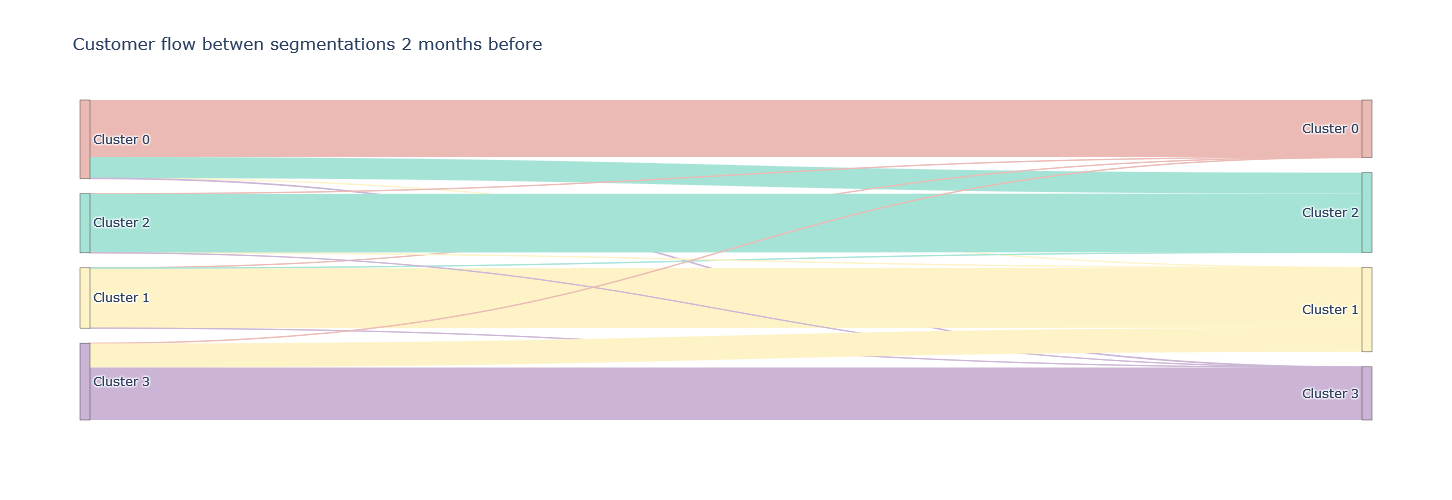

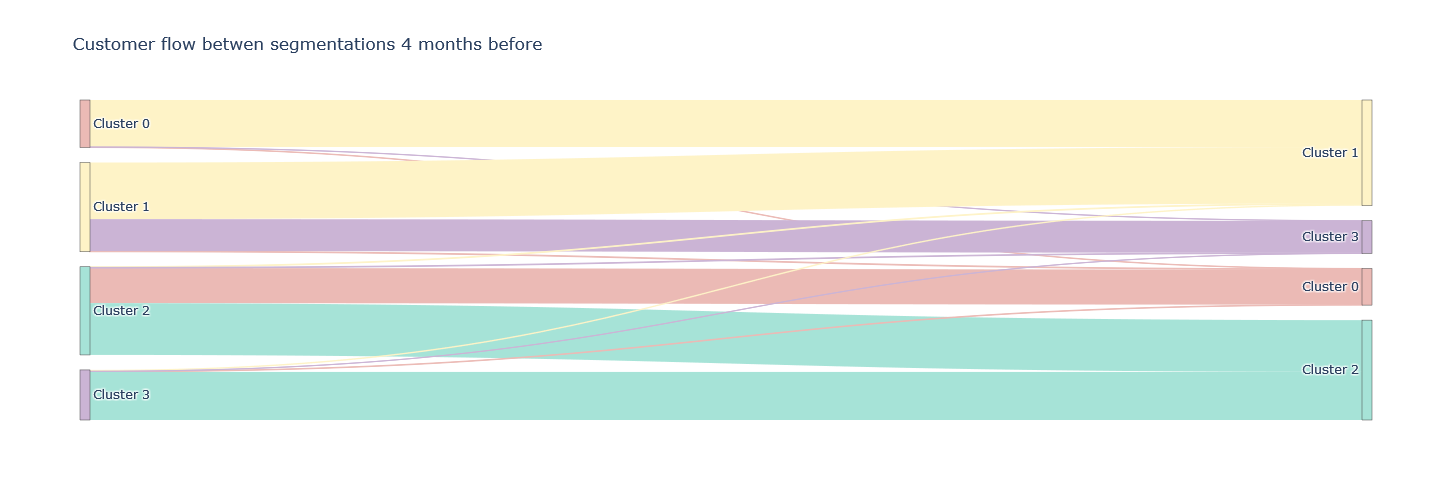

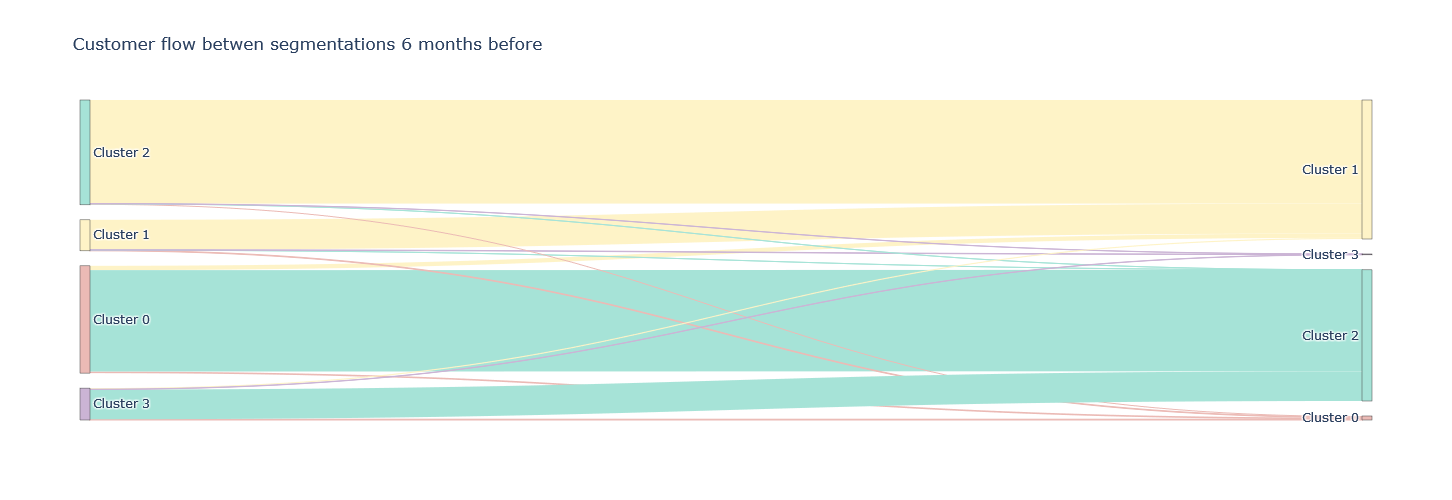

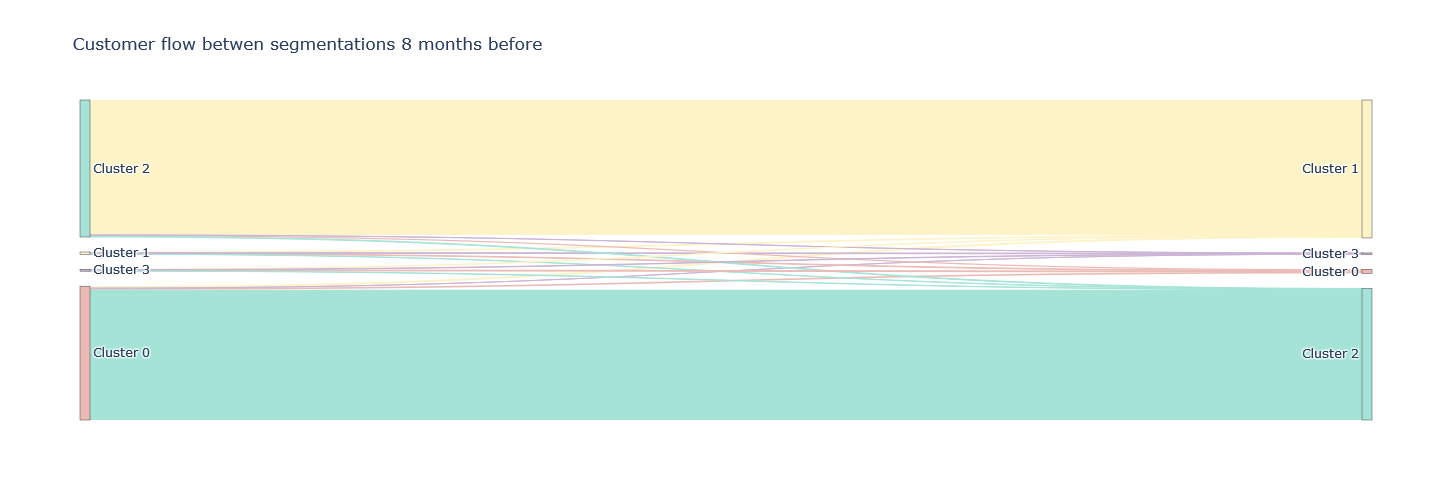

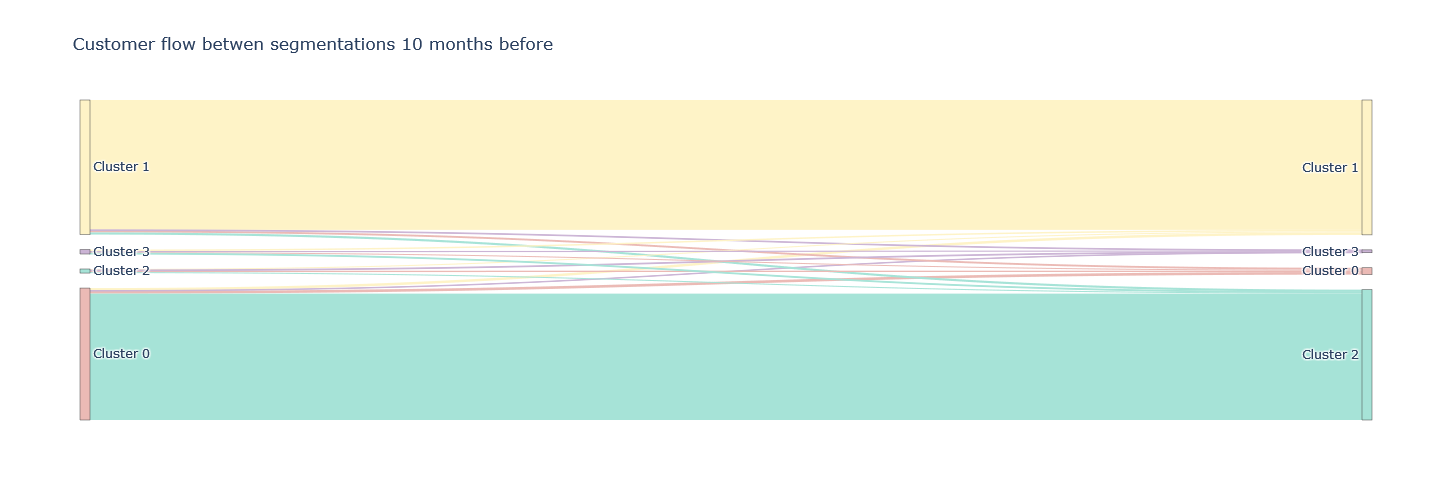

In [71]:
for i in range(2, 12, 2):
    
    globals()["VALUE_LIST_" + str(i)] = []
    
    for ind in globals()["df_sankey_0_vs_" + str(i) + "_pivoted"].index:
        for col in globals()["df_sankey_0_vs_" + str(i) + "_pivoted"].columns:
            if col != "cluster_initial":
                globals()["VALUE_LIST_" + str(i)]\
                    .append(globals()["df_sankey_0_vs_" + str(i) + "_pivoted"][col][ind])
                
                
    link = dict(source=SOURCE, target=TARGET, 
                value=globals()["VALUE_LIST_" + str(i)], 
                color=COLOR_LINK)
    node = dict(label=LABEL, pad=15, thickness=10, 
                color=COLOR_NODE)
    data = go.Sankey(link=link, 
                     node=node)
    
    title = "Customer flow betwen segmentations " + str(i) + " months before"
    
    fig = go.Figure(data)
    fig.update_layout(
        hovermode="x", 
        title=title,
        autosize=False,
        width=600,
        height=500,
    )
    fig.show()

<div class="alert alert-block alert-info">
    <p>Sankey diagram in image format</p>
</div>

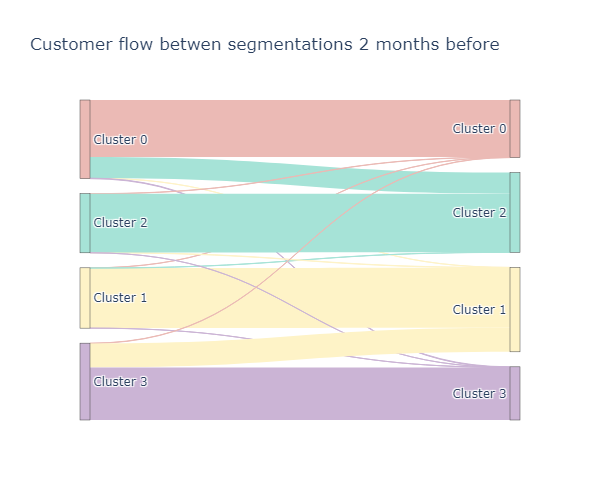

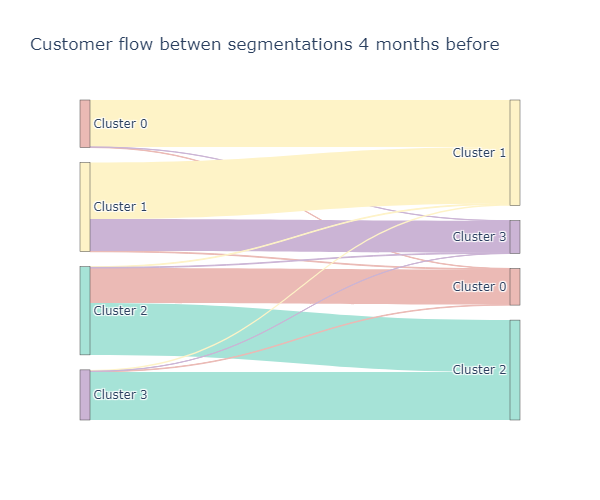

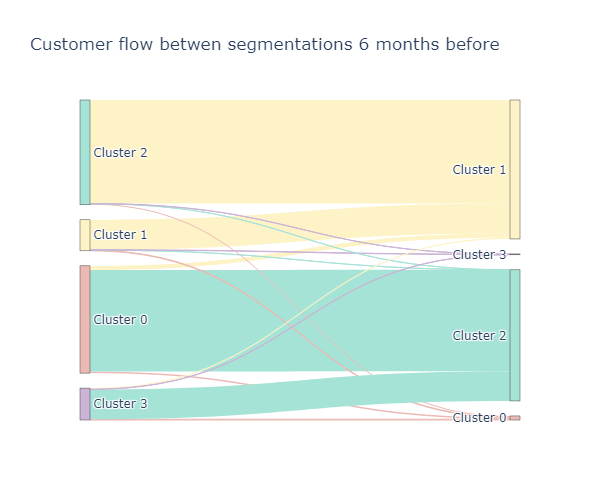

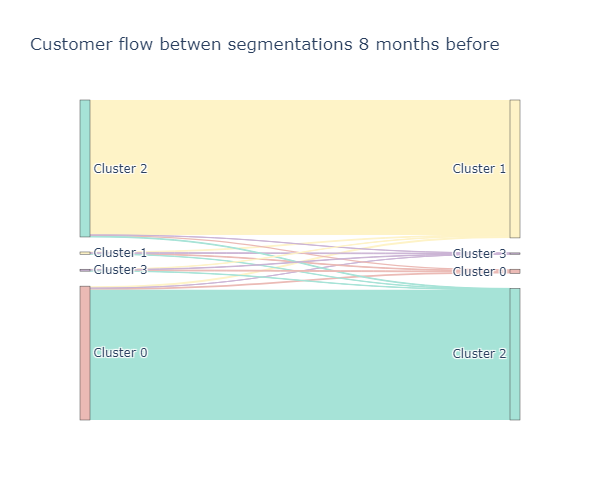

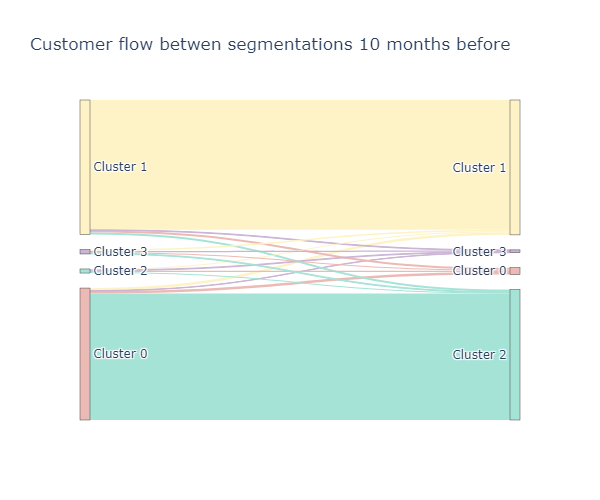

In [72]:
for i in range(2, 12, 2):
    
    globals()["VALUE_LIST_" + str(i)] = []
    
    for ind in globals()["df_sankey_0_vs_" + str(i) + "_pivoted"].index:
        for col in globals()["df_sankey_0_vs_" + str(i) + "_pivoted"].columns:
            if col != "cluster_initial":
                globals()["VALUE_LIST_" + str(i)]\
                    .append(globals()["df_sankey_0_vs_" + str(i) + "_pivoted"][col][ind])
                
                
    link = dict(source=SOURCE, target=TARGET, 
                value=globals()["VALUE_LIST_" + str(i)], 
                color=COLOR_LINK)
    node = dict(label=LABEL, pad=15, thickness=10, 
                color=COLOR_NODE)
    data = go.Sankey(link=link, 
                     node=node)
    
    title = "Customer flow betwen segmentations " + str(i) + " months before"
    
    fig = go.Figure(data)
    fig.update_layout(
        hovermode="x", 
        title=title,
        autosize=False,
        width=600,
        height=500,
    )
    fig.show("png")

1. Silhouette Analysis vs Elbow Method vs Davies-Bouldin Index: Selecting the optimal number of clusters for KMeans clustering<br>
   https://gdcoder.com/silhouette-analysis-vs-elbow-method-vs-davies-bouldin-index-selecting-the-optimal-number-of-clusters-for-kmeans-clustering/<br>

2. Selecting the number of clusters with silhouette analysis on KMeans clustering<br>
   https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py<br>

3. Clustering metrics better than the elbow-method<br>
   https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6<br>
    
4. A demo of K-Means clustering on the handwritten digits data<br>
   https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#a-demo-of-k-means-clustering-on-the-handwritten-digits-data<br>

https://www.definitions-marketing.com/definition/segmentation-rfm/<br>
https://lms.simplilearn.com/courses/4414/Introduction-to-Supervised-&-Unsupervised-Machine-Learning/syllabus<br>

https://classroom.udacity.com/courses/st101<br>
https://classroom.udacity.com/courses/ud827<br>
https://www.freecodecamp.org/news/free-machine-learning-course-10-hourse/<br>

https://towardsdatascience.com/10-highly-probable-data-scientist-interview-questions-fd83f7414760<br>